In [1]:
import pandas as pd

raw_dataset = pd.read_csv("Covers.csv")

raw_dataset

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
0,Abc,The Jackson 5,2:42,4,0.682,0.926,3,-2.515,0,0.0607,0.04040,0.000000,0.1900,0.860,105.969,81,1970
1,Let It Be,The Beatles,4:03,4,0.443,0.403,0,-8.339,1,0.0322,0.63100,0.000000,0.1110,0.410,143.462,78,1970
2,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,0.30500,0.000114,0.3700,0.885,196.606,78,1970
3,Cecilia,Simon & Garfunkel,2:54,4,0.755,0.876,0,-8.867,1,0.0362,0.35700,0.000005,0.2200,0.954,102.762,76,1970
4,Spirit In The Sky,Norman Greenbaum,4:02,4,0.609,0.617,9,-7.091,1,0.0307,0.09940,0.004040,0.1180,0.543,128.903,75,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,Sister Sledge,6:15,4,0.700,0.815,7,-9.711,0,0.0440,0.00115,0.001240,0.0901,0.837,113.245,14,1979
976,Don’t Cry Out Loud,Melissa Manchester,2:15,4,0.298,0.252,0,-8.950,1,0.0339,0.90100,0.000009,0.1270,0.193,90.955,9,1979
977,When You’re In Love With A Beautiful Woman,Dr. Hook,2:54,4,0.665,0.663,8,-11.367,1,0.0386,0.48500,0.006820,0.1570,0.792,110.656,7,1979
978,I’ll Never Love This Way Again,Dionne Warwick,2:58,4,0.452,0.434,8,-8.870,1,0.0399,0.79200,0.013900,0.1650,0.247,137.702,5,1979


In [2]:
raw_dataset.info()

modified_dataset = raw_dataset.copy()

modified_dataset["Duration"] = modified_dataset["Duration"].str.split(":")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

In [3]:
modified_dataset["Duration"] = modified_dataset["Duration"].apply(lambda x: int(x[0]) * 60 + int(x[1]))

modified_dataset["Duration"]

0      162
1      243
2      176
3      174
4      242
      ... 
975    375
976    135
977    174
978    178
979    248
Name: Duration, Length: 980, dtype: int64

In [4]:
dataset_largo = pd.read_csv('./archive/data.csv')
dataset_largo.columns = [col + '_2' for col in dataset_largo.columns]
dataset_largo_mod = dataset_largo[(dataset_largo['year_2']<1980) & (dataset_largo['year_2']>=1970)]
dataset_largo_mod

FileNotFoundError: [Errno 2] No such file or directory: './archive/data.csv'

In [6]:
union = raw_dataset.merge(dataset_largo,left_on=['Track'],right_on=['name_2'])

union_artists = union[union.apply(lambda row: row['Artist'] in row['artists_2'], axis=1)]

union_artists

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,...,instrumentalness_2,liveness_2,loudness_2,speechiness_2,tempo_2,valence_2,mode_2,key_2,popularity_2,explicit_2
5,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,...,0.000120,0.3700,-13.559,0.0571,196.605,0.886,1,8,76,0
7,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,...,0.006140,0.1780,-8.325,0.0340,98.185,0.944,1,8,63,0
8,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,...,0.002300,0.2150,-6.264,0.0326,98.264,0.947,1,8,64,0
9,I Want You Back,The Jackson 5,2:56,4,0.469,0.538,8,-13.559,1,0.0575,...,0.000013,0.2800,-12.777,0.0303,98.185,0.937,1,8,57,0
12,Cecilia,Simon & Garfunkel,2:54,4,0.755,0.876,0,-8.867,1,0.0362,...,0.000005,0.2200,-8.867,0.0362,102.762,0.954,1,0,74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,Music Box Dancer,Frank Mills,3:12,4,0.466,0.471,1,-13.762,1,0.0390,...,0.824000,0.1220,-13.761,0.0390,132.164,0.794,1,1,42,0
1815,How You Gonna See Me Now,Alice Cooper,3:55,4,0.544,0.336,5,-14.413,1,0.0380,...,0.000003,0.1330,-14.413,0.0380,136.516,0.298,1,5,51,0
1816,Heaven Must Have Sent You,Bonnie Pointer,2:32,4,0.656,0.523,2,-9.341,0,0.0287,...,0.000147,0.0388,-12.285,0.0393,128.613,0.921,1,0,46,0
1818,A Little More Love,Olivia Newton-John,3:27,4,0.717,0.414,8,-14.855,1,0.0364,...,0.009350,0.0864,-14.855,0.0365,100.178,0.495,1,8,39,0


In [7]:
union_artists[union_artists['Popularity'] == union_artists['popularity_2']][['Artist','artists_2']].shape[0]

41

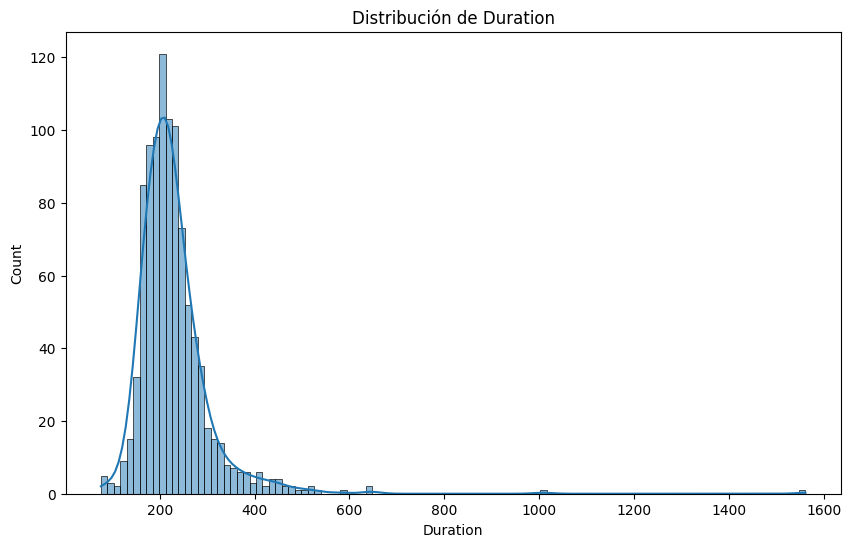

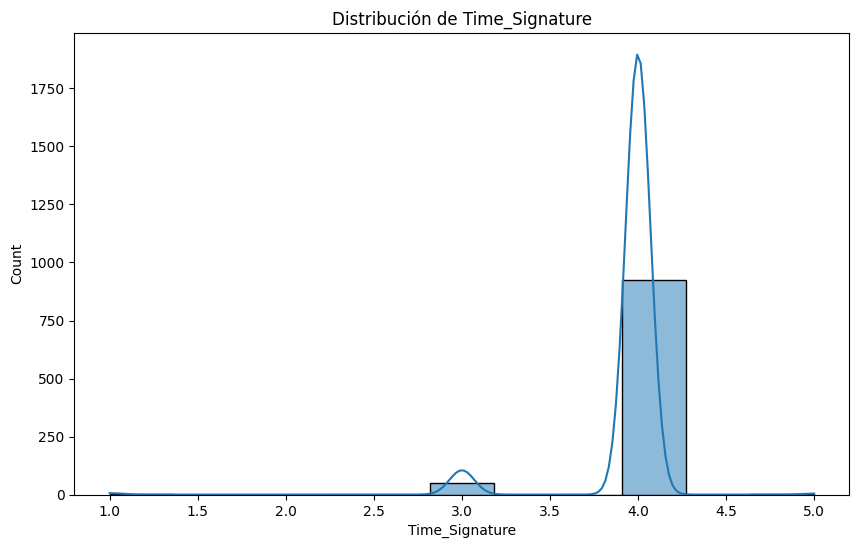

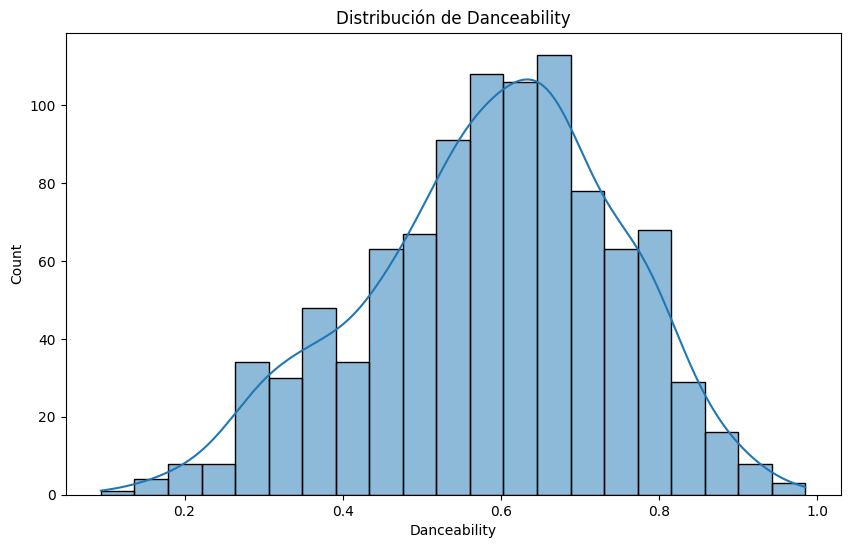

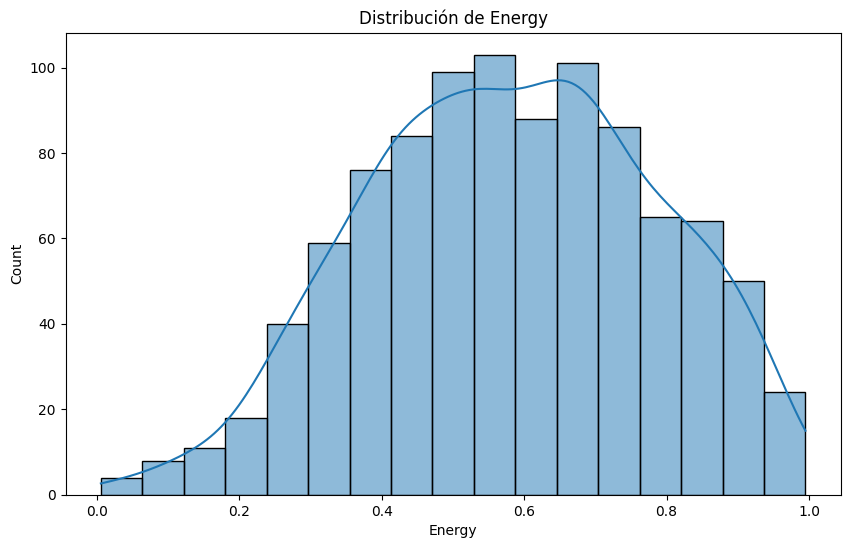

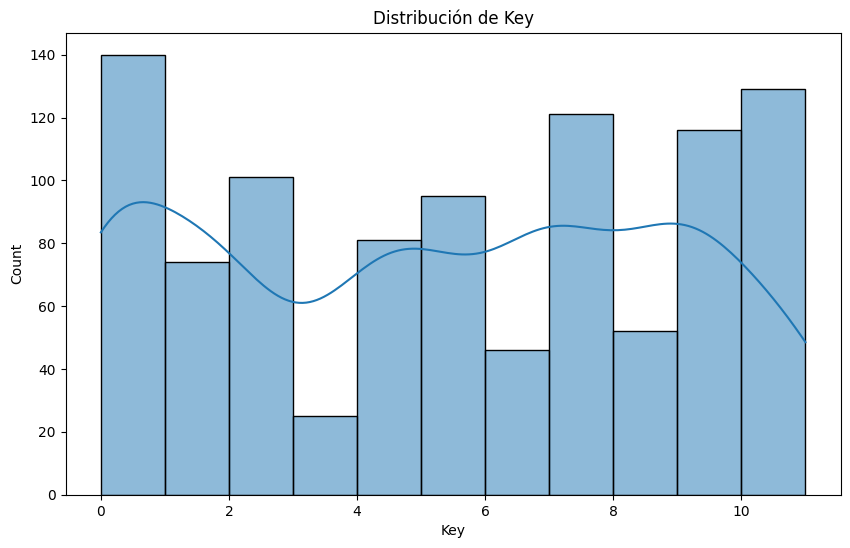

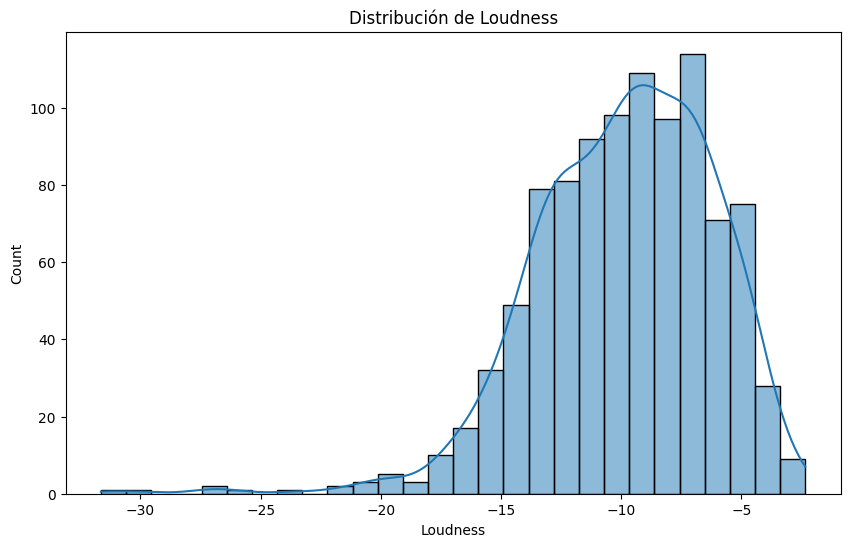

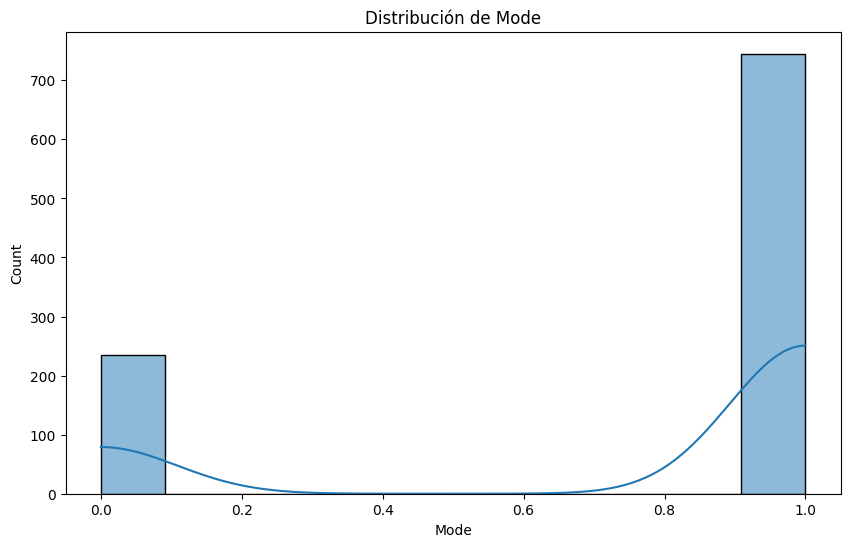

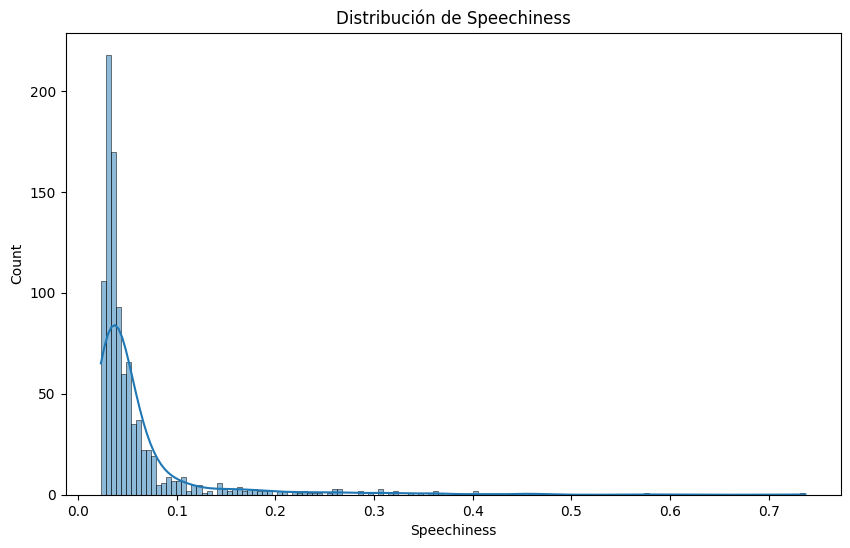

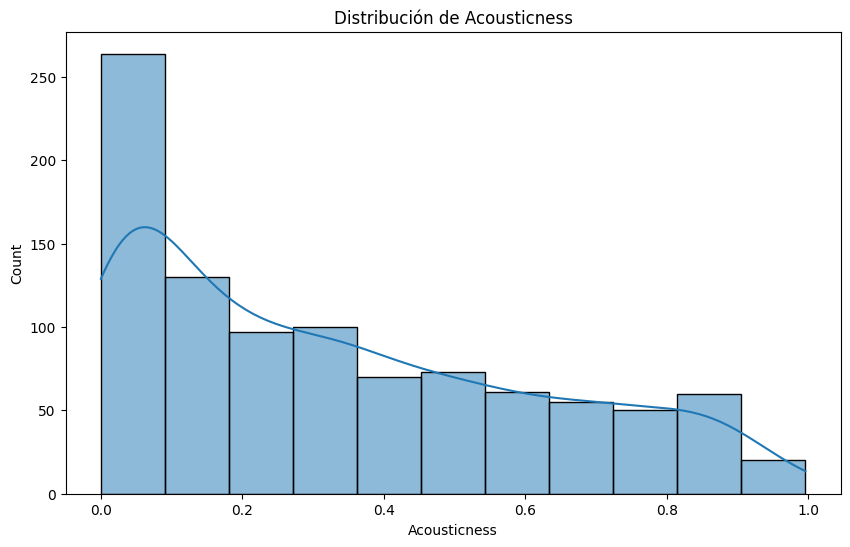

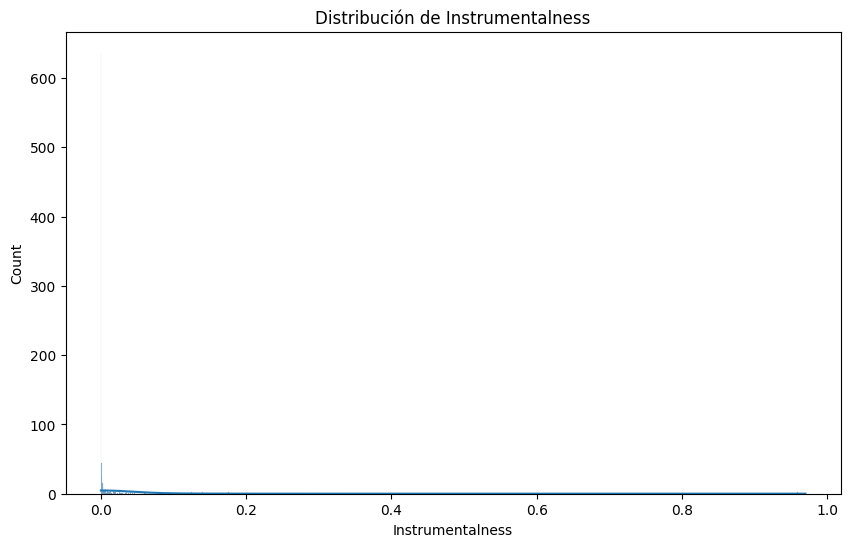

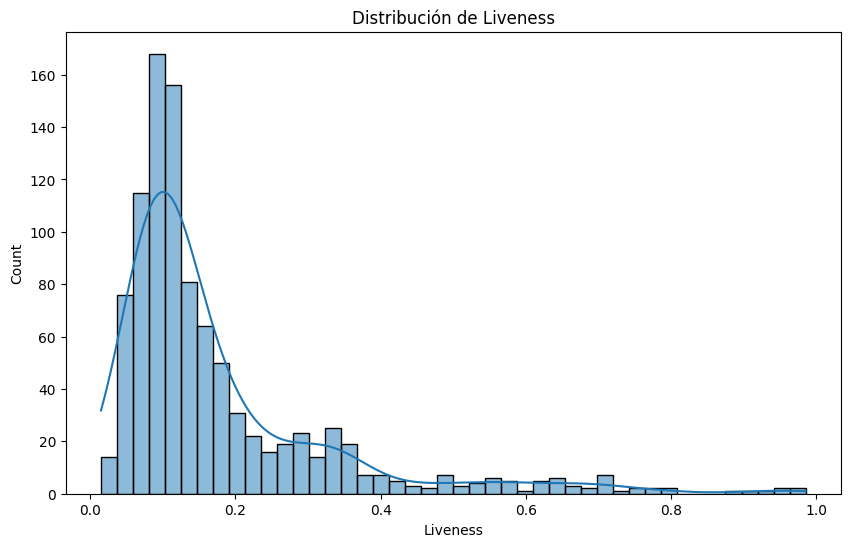

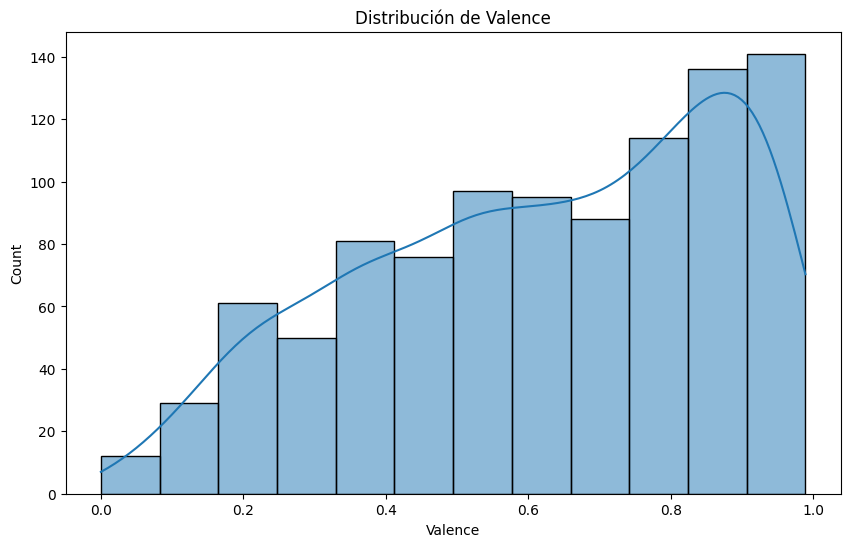

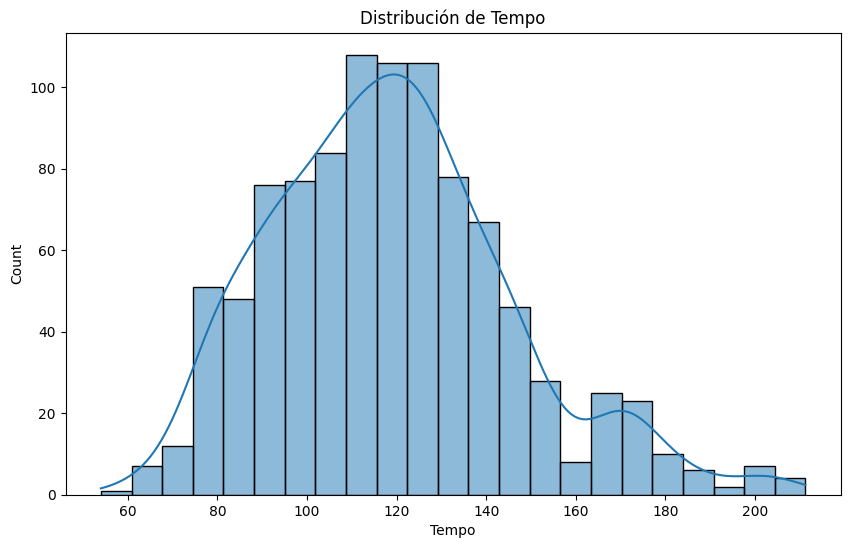

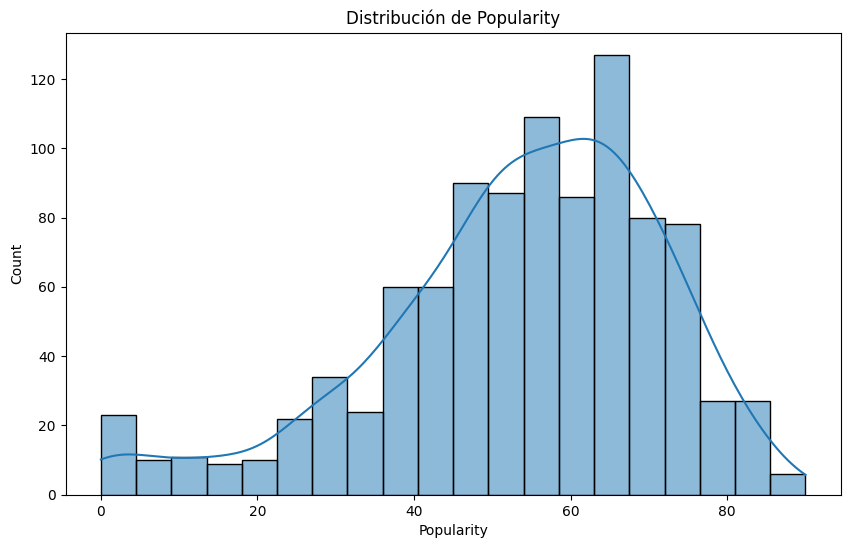

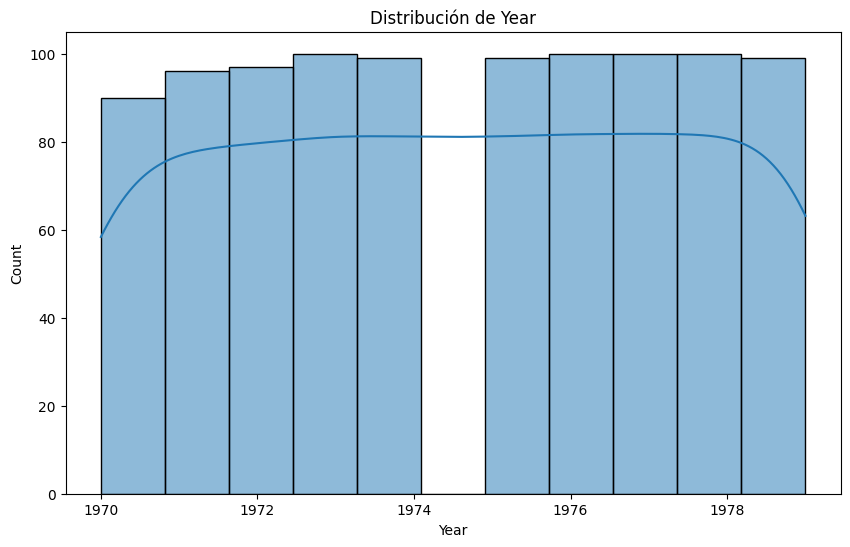

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
df = modified_dataset

# Visualizar la distribución de variables numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.show()



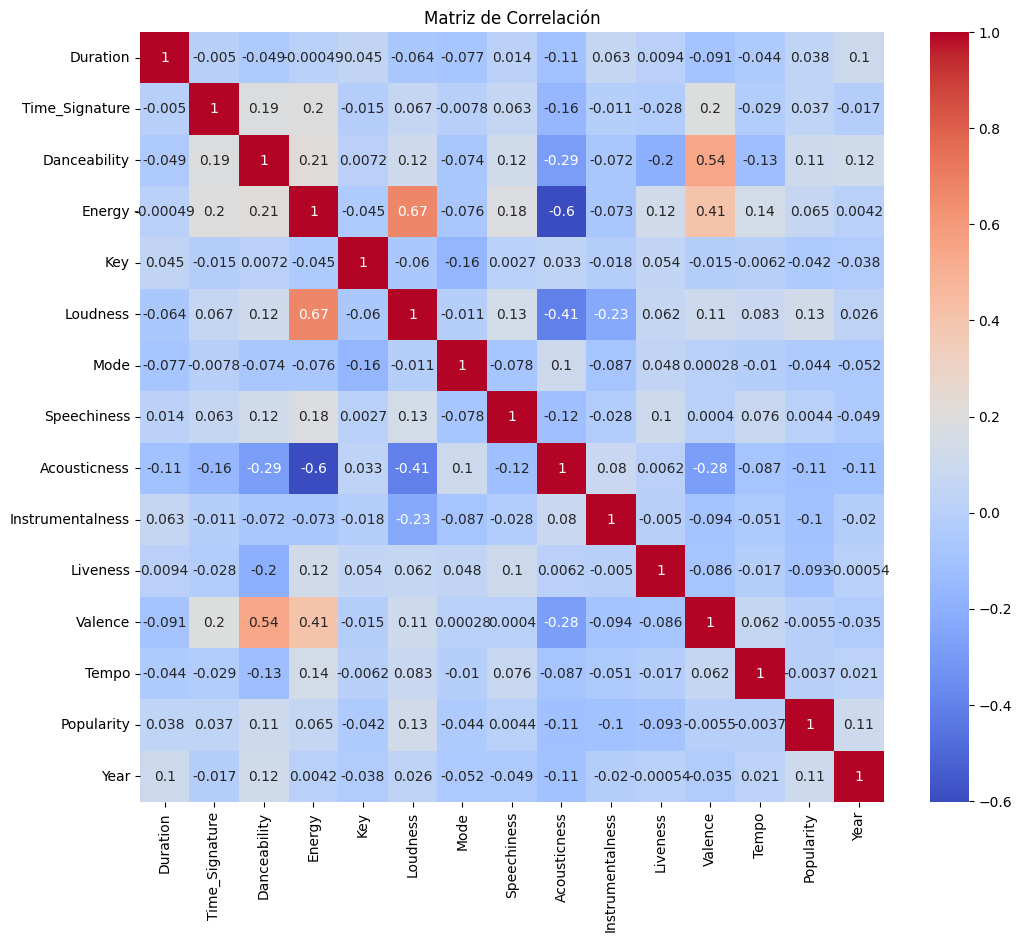

In [9]:
# Matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()



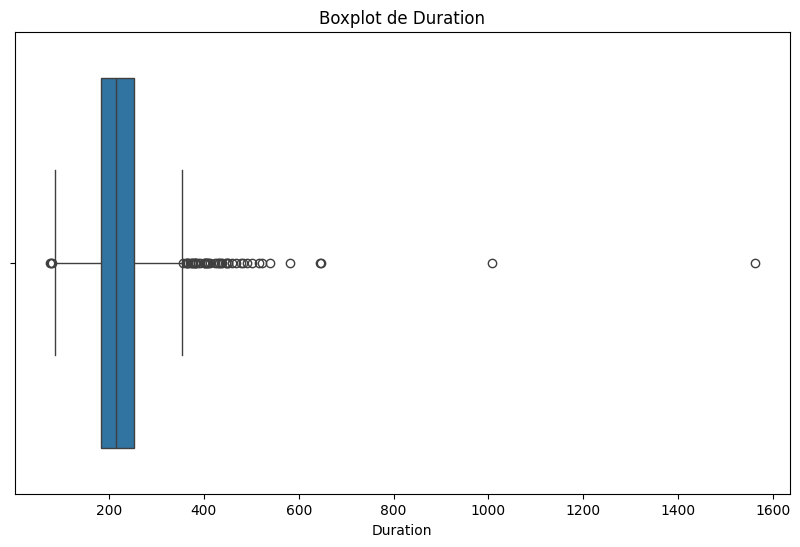

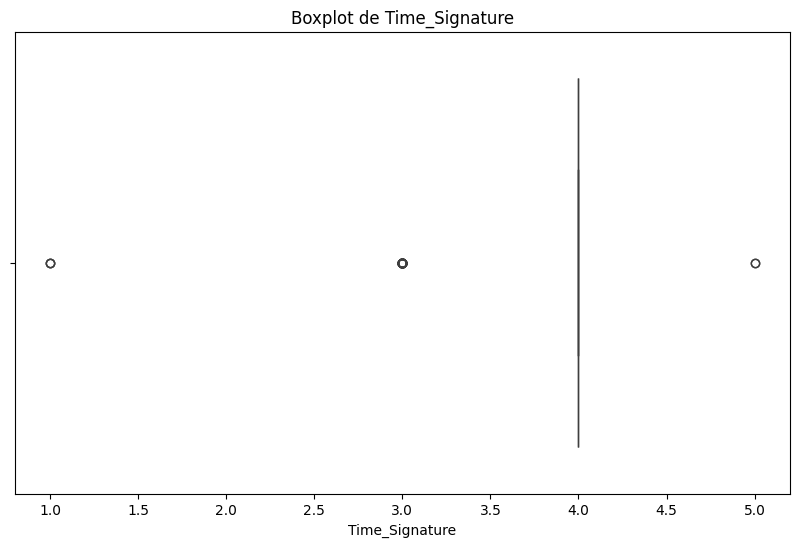

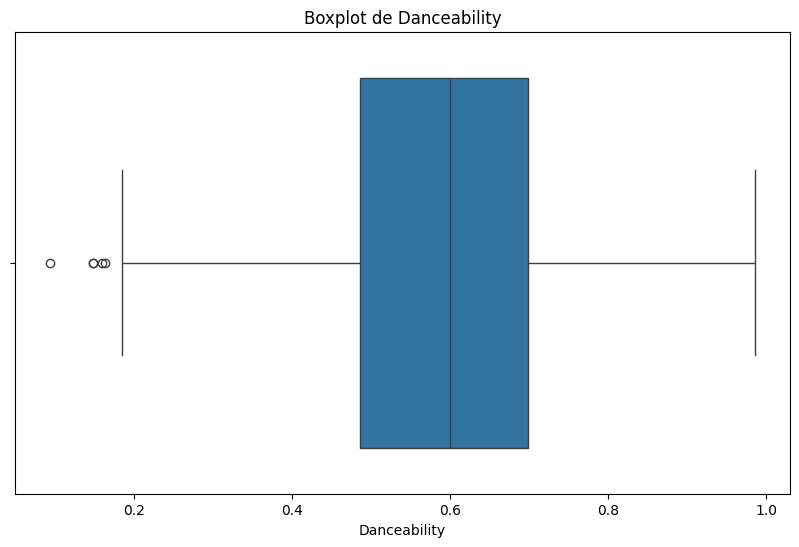

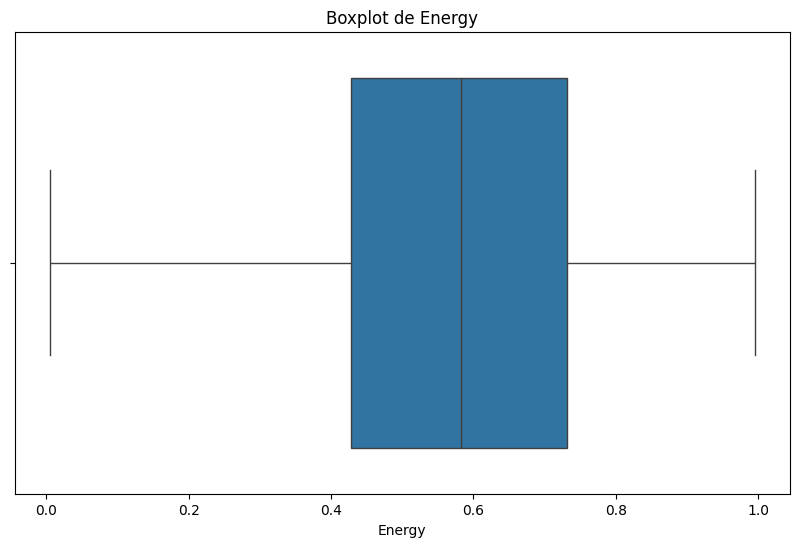

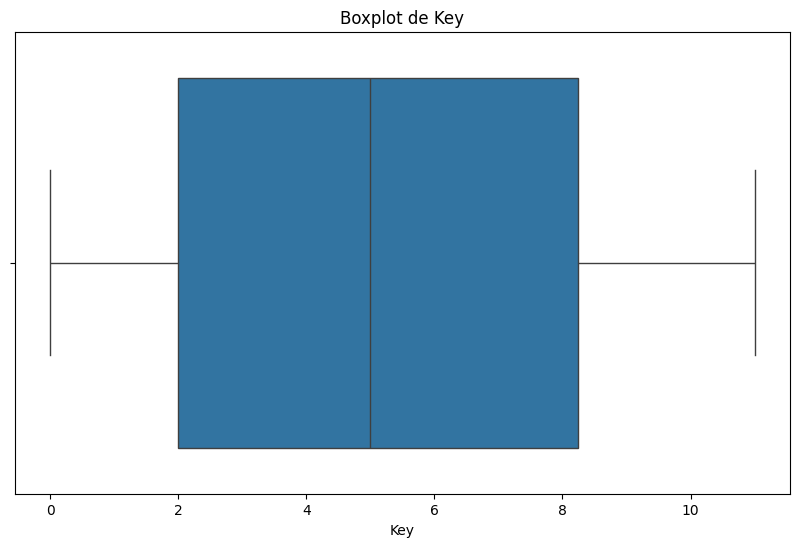

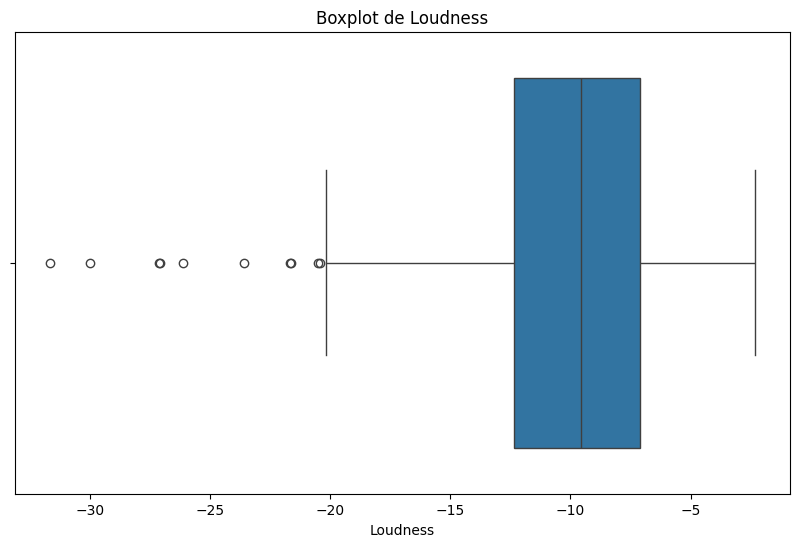

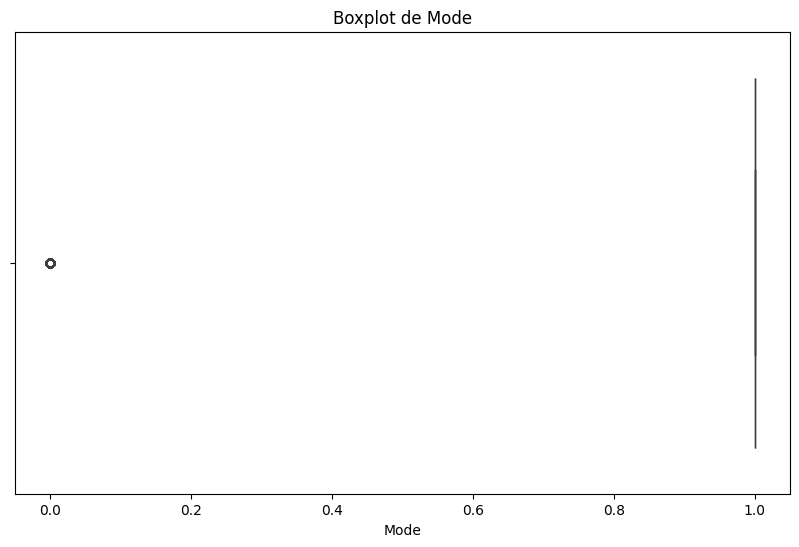

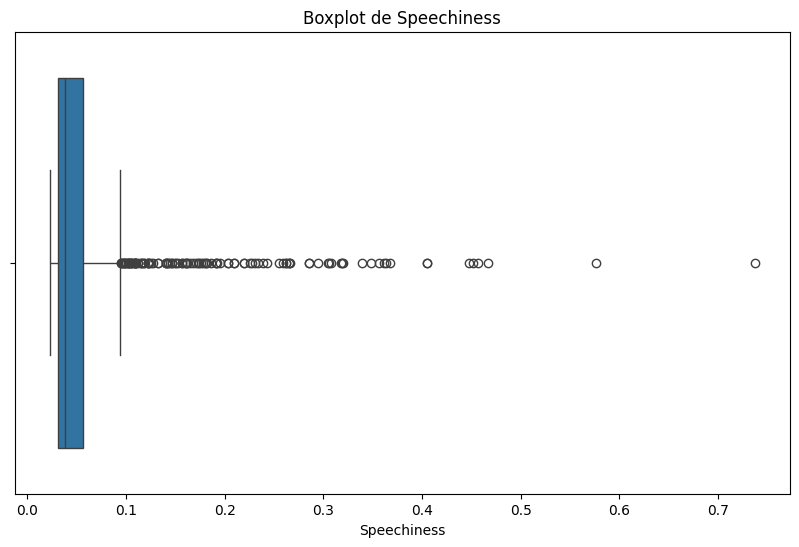

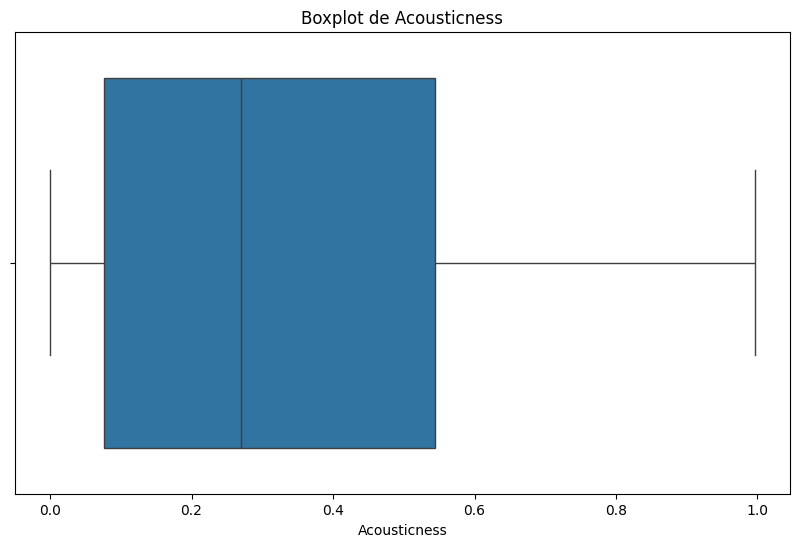

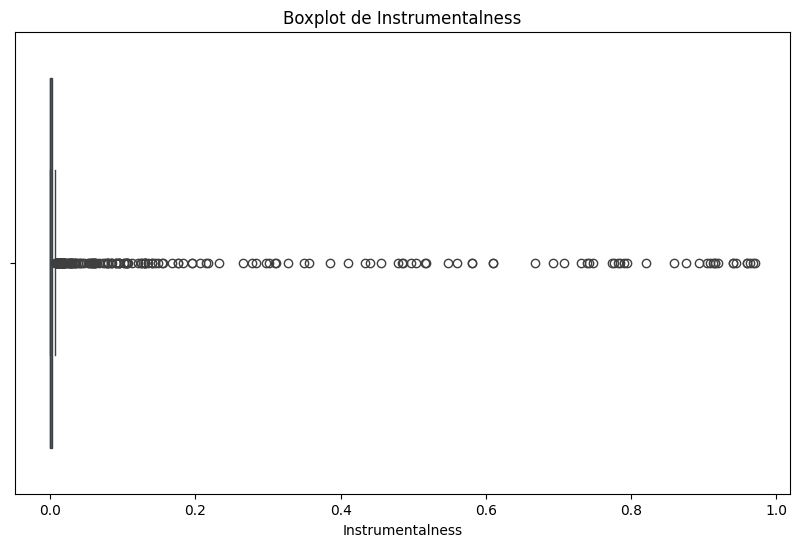

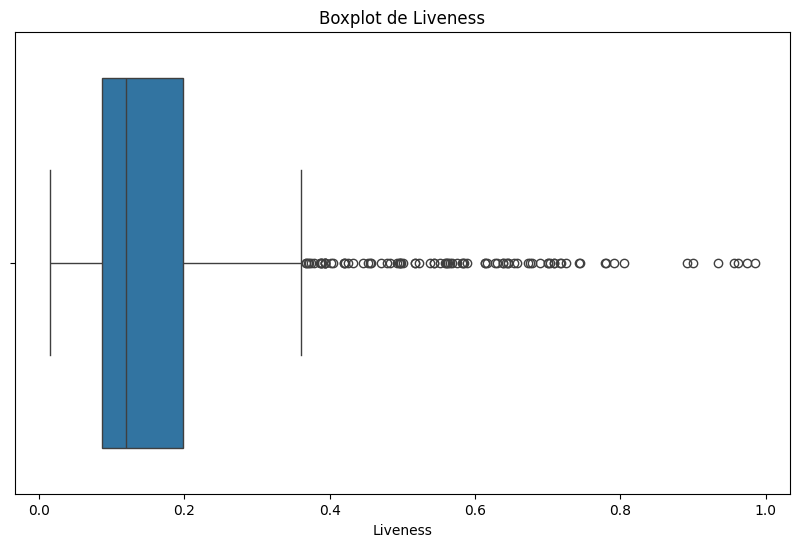

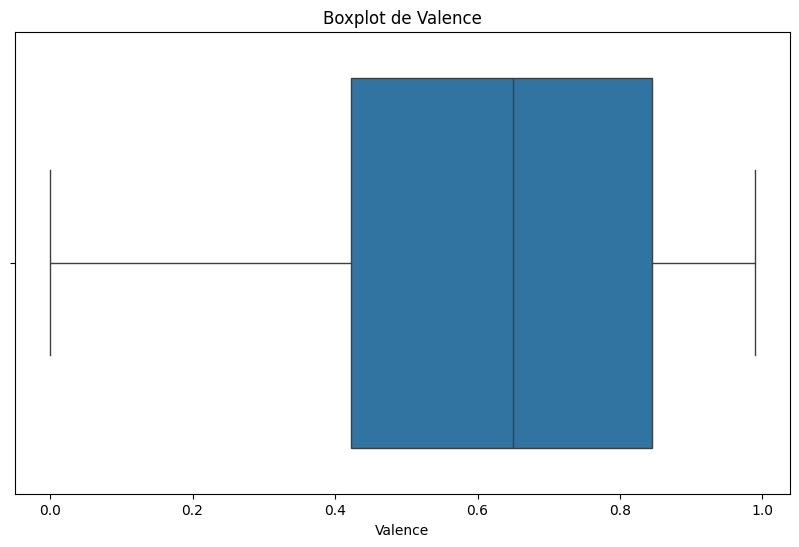

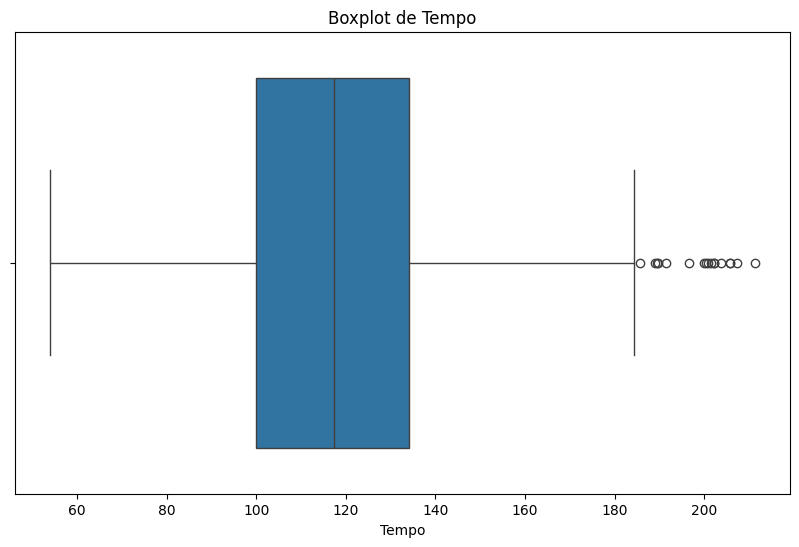

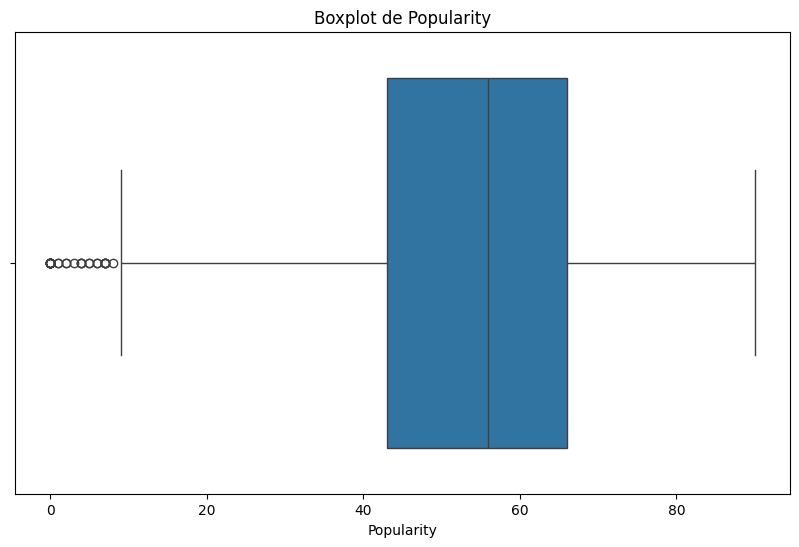

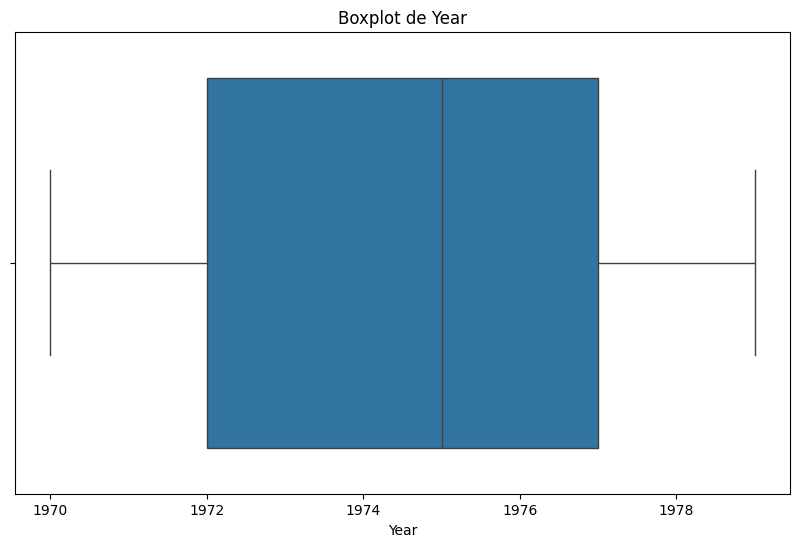

In [10]:
# Boxplots para detectar outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.show()



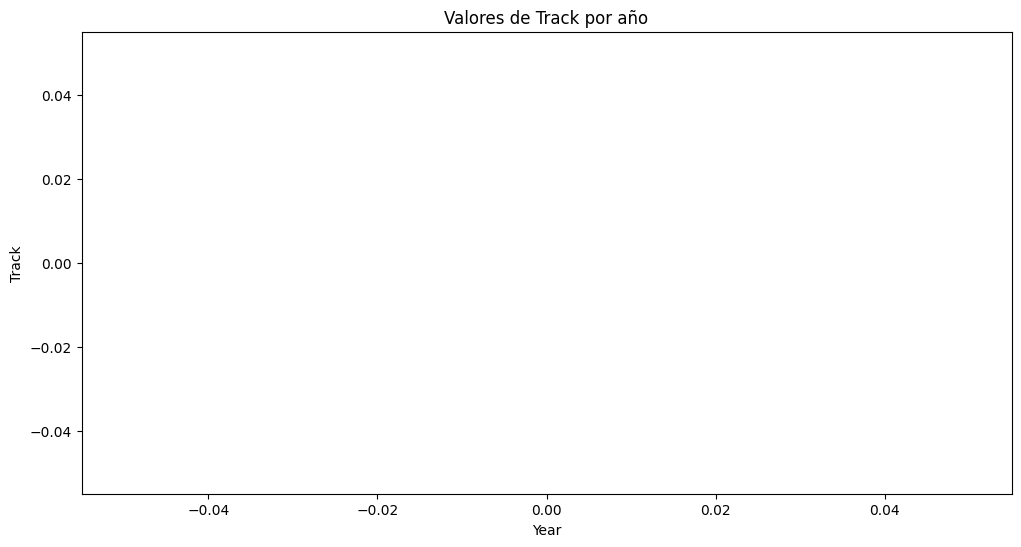

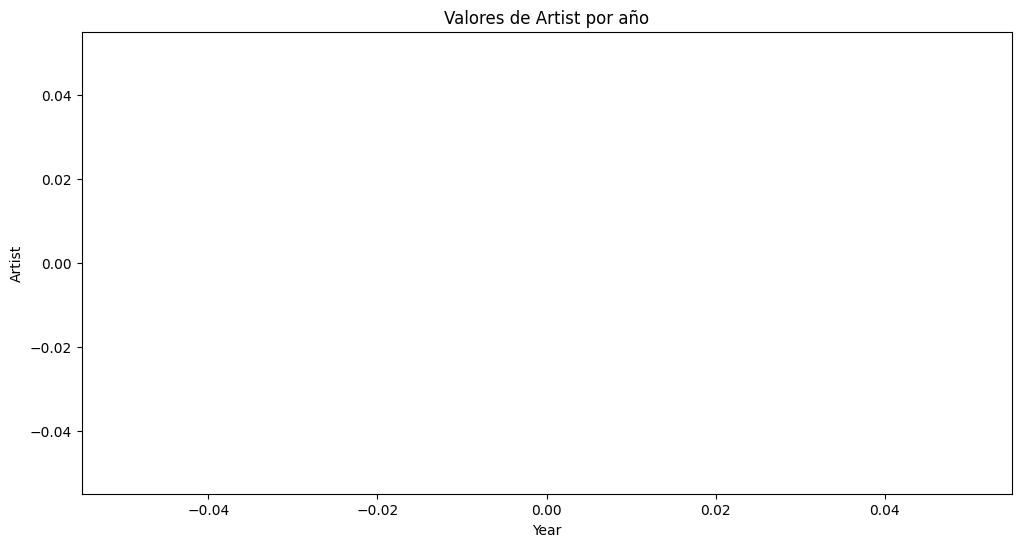

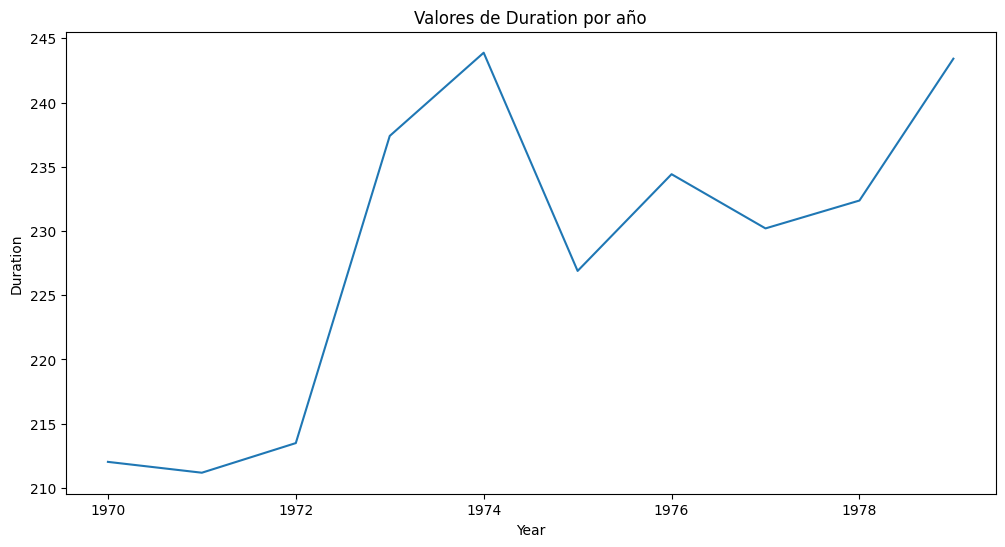

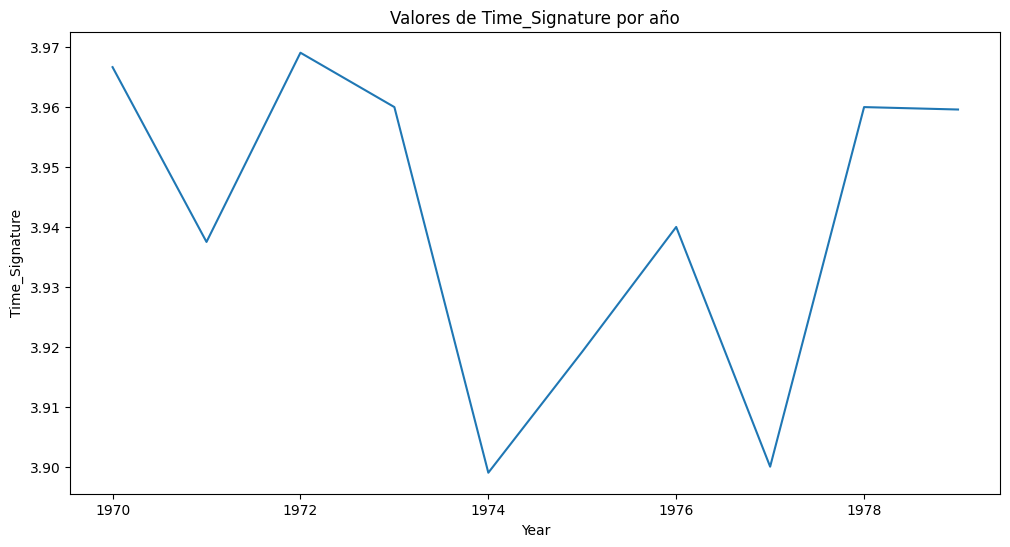

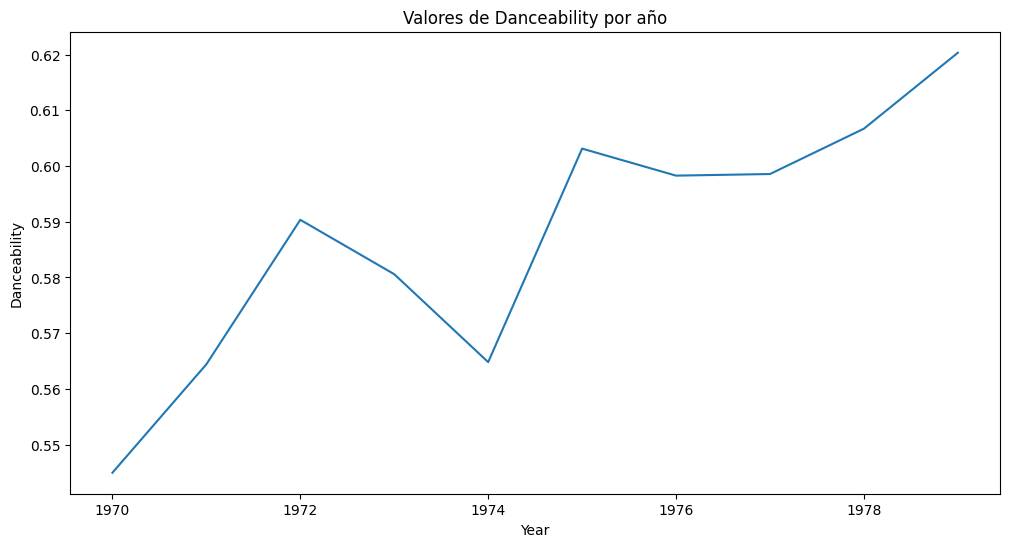

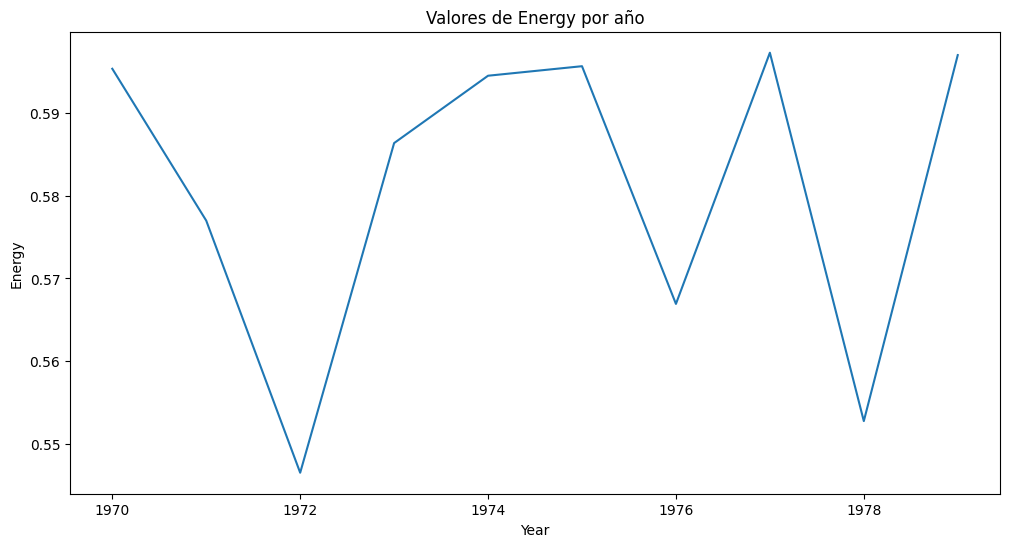

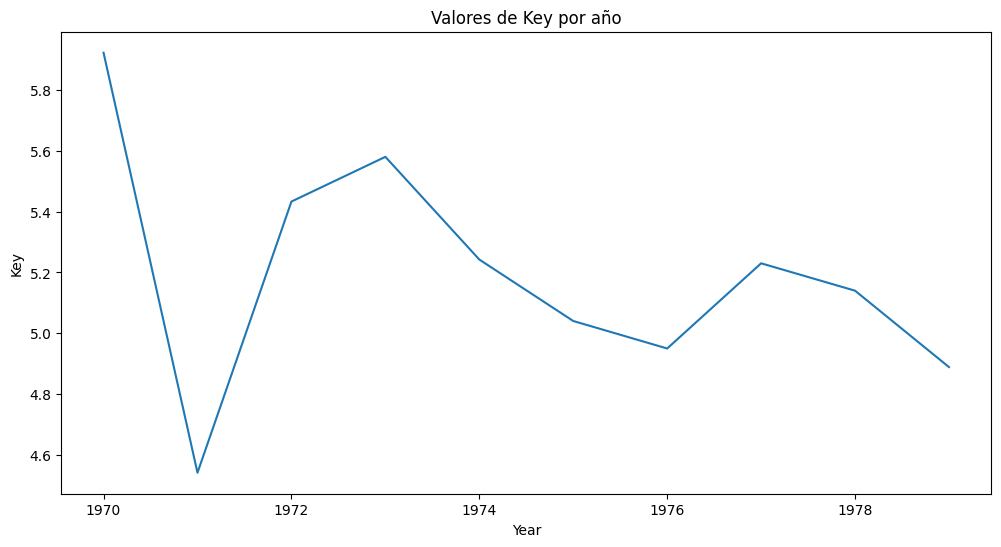

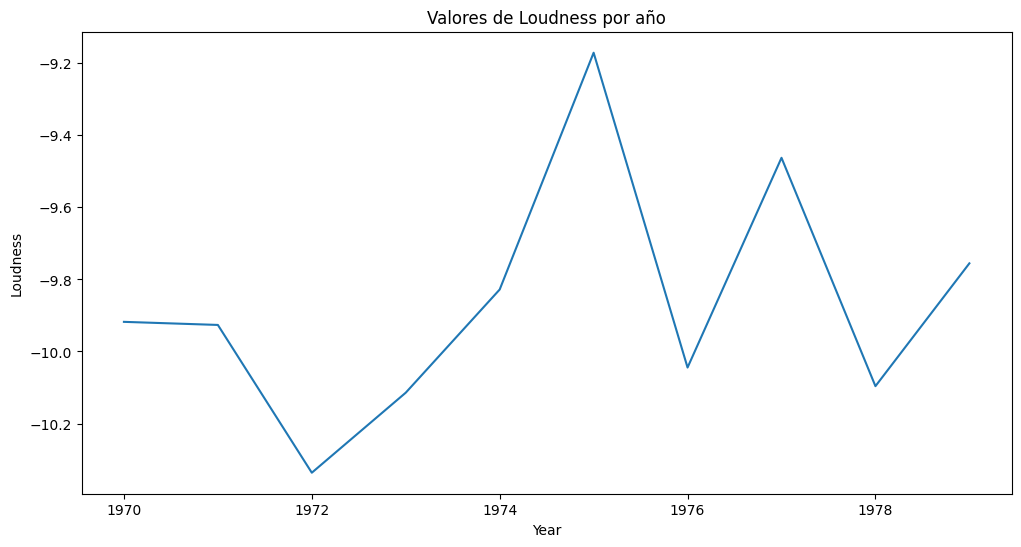

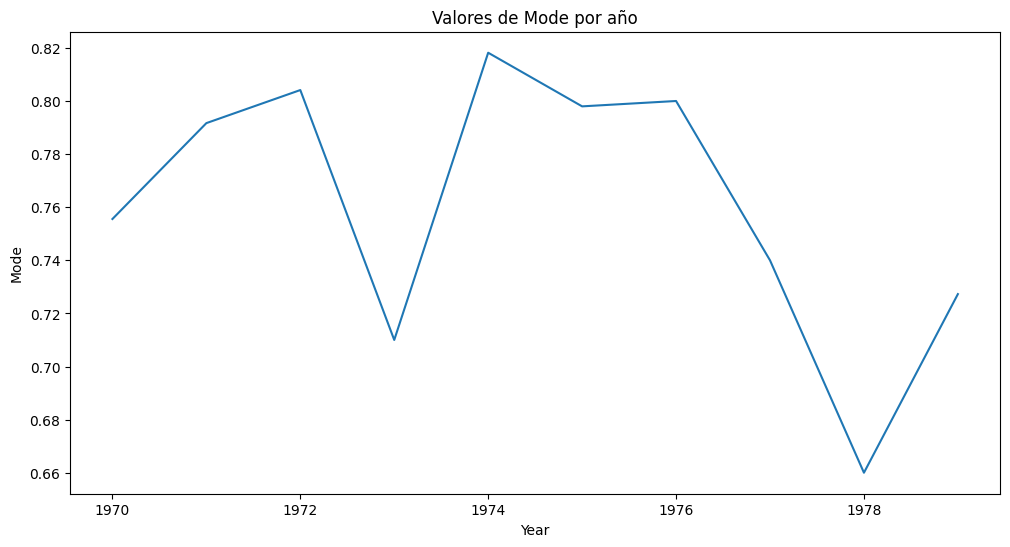

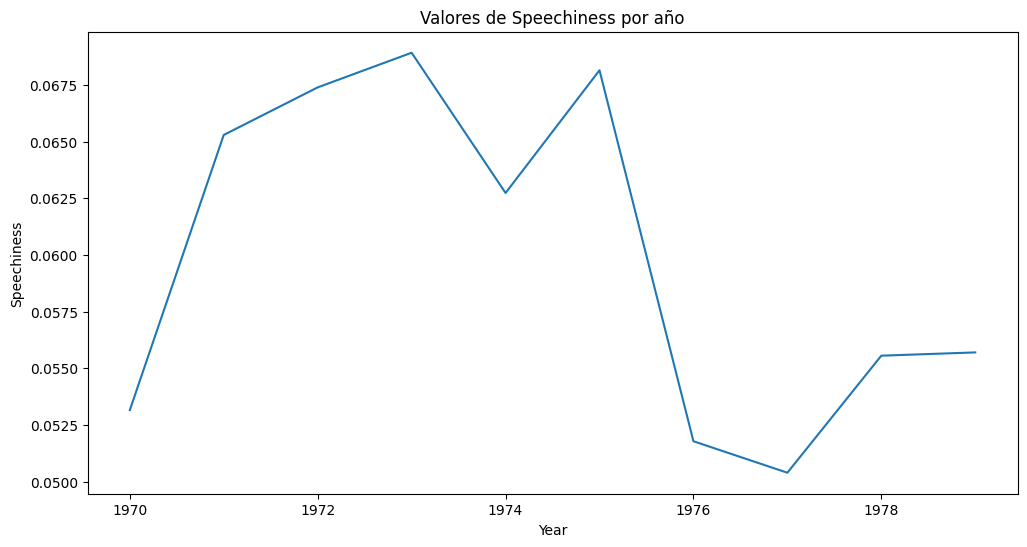

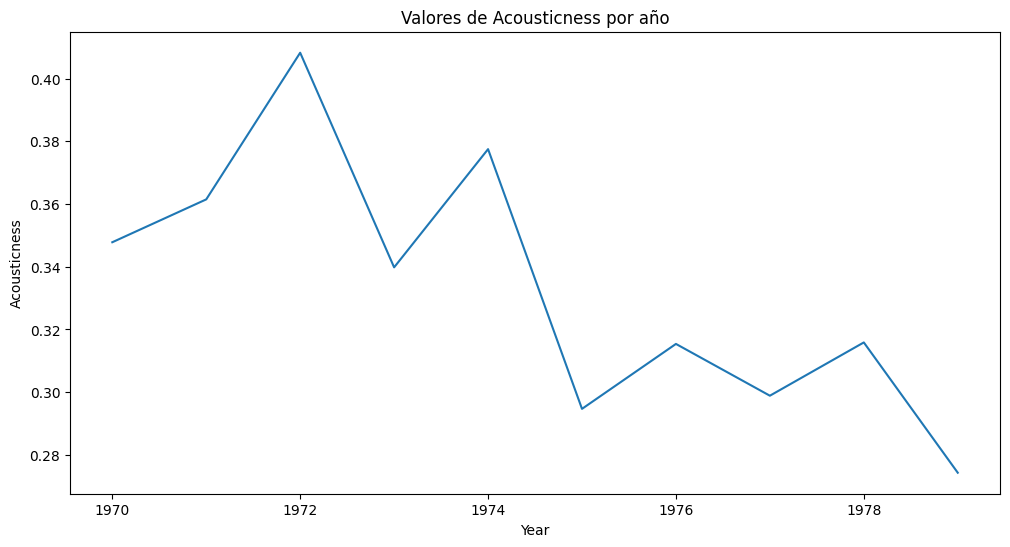

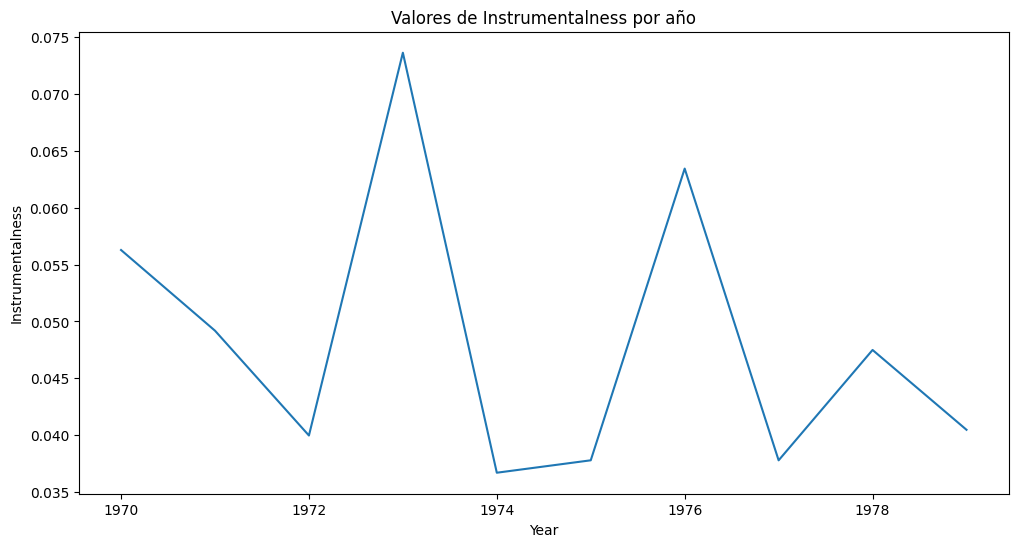

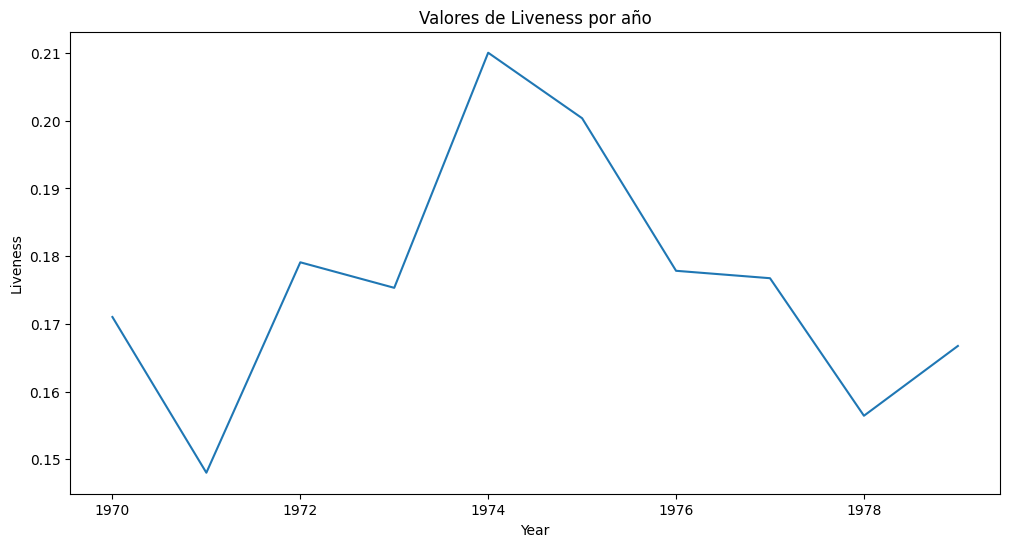

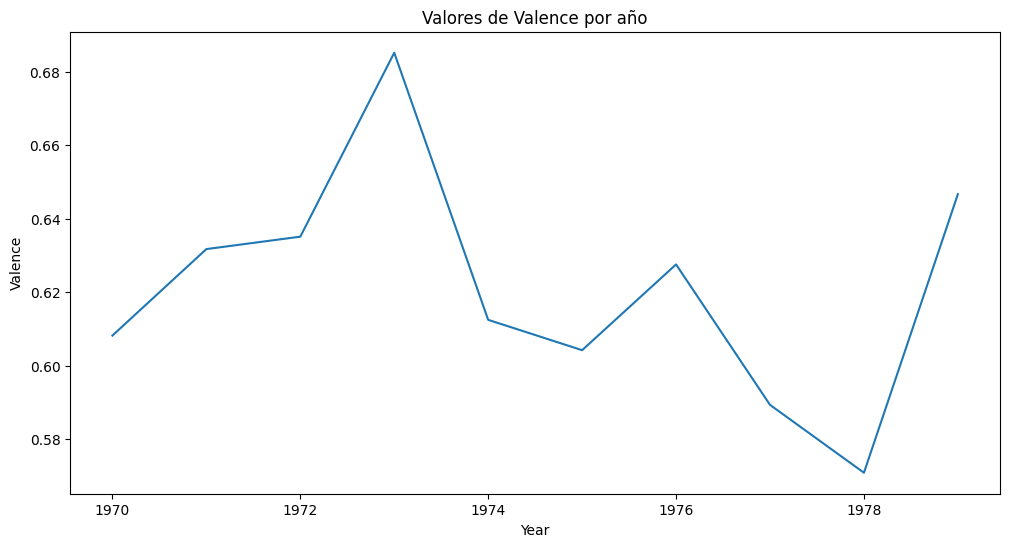

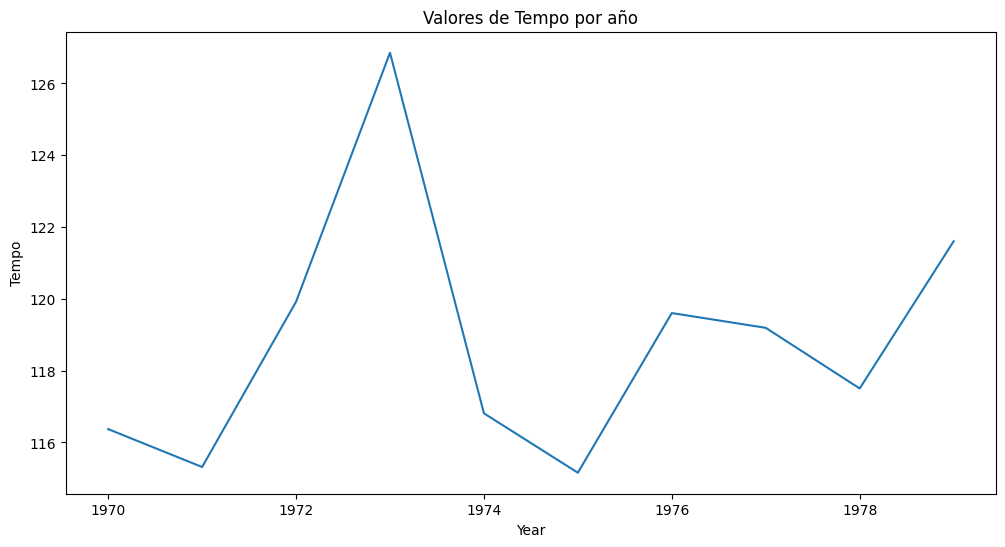

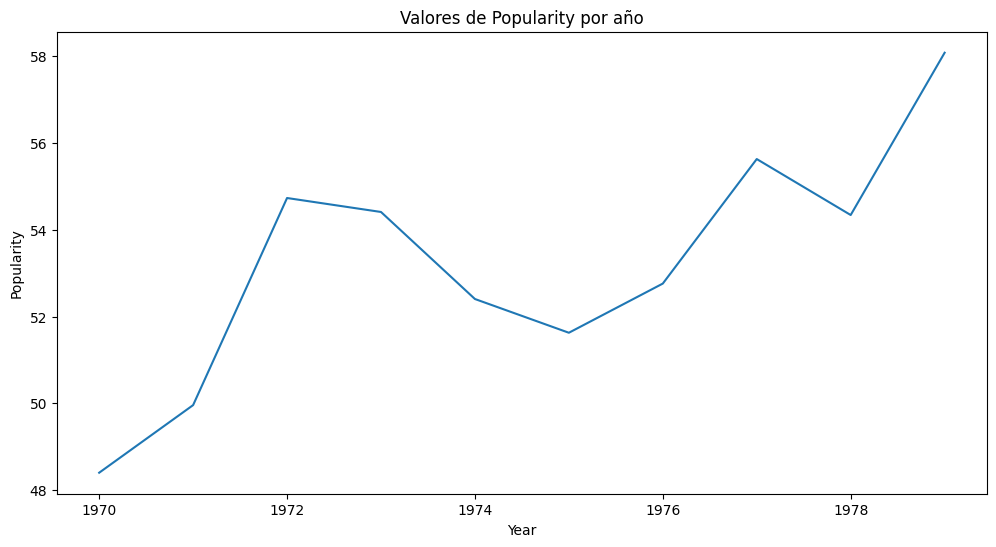

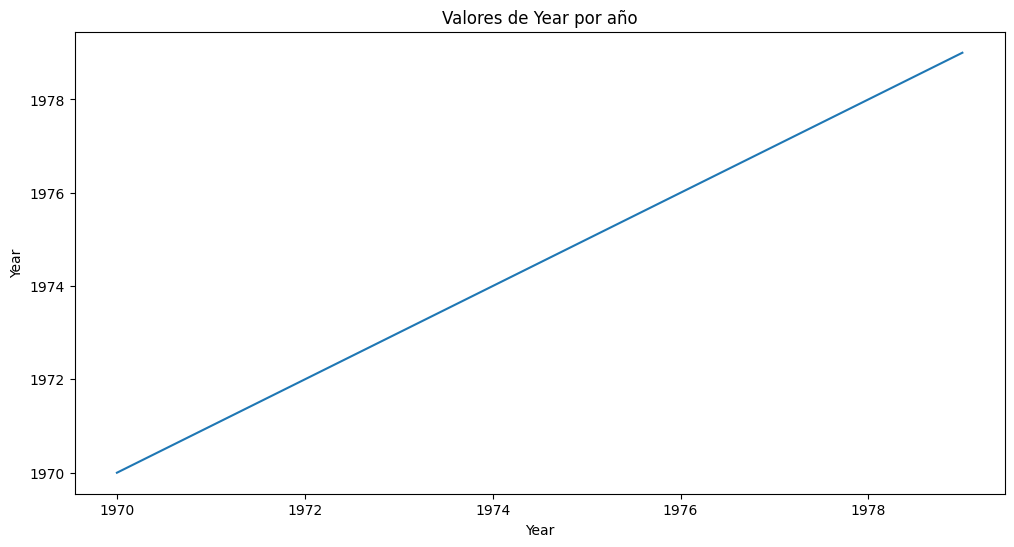

In [11]:
for col in modified_dataset.columns:
    try:
        # Convertir la columna a numérica (ignorando errores si hay valores no convertibles)
        df[col] = pd.to_numeric(df[col], errors='coerce')
        # Análisis temporal
        plt.figure(figsize=(12, 6))
        df.groupby('Year')[col].mean().plot()
        plt.title(f'Valores de {col} por año')
        plt.ylabel(col)
        plt.show()
    except Exception as e:
        print(f'Error en la columna {col}: {e}')


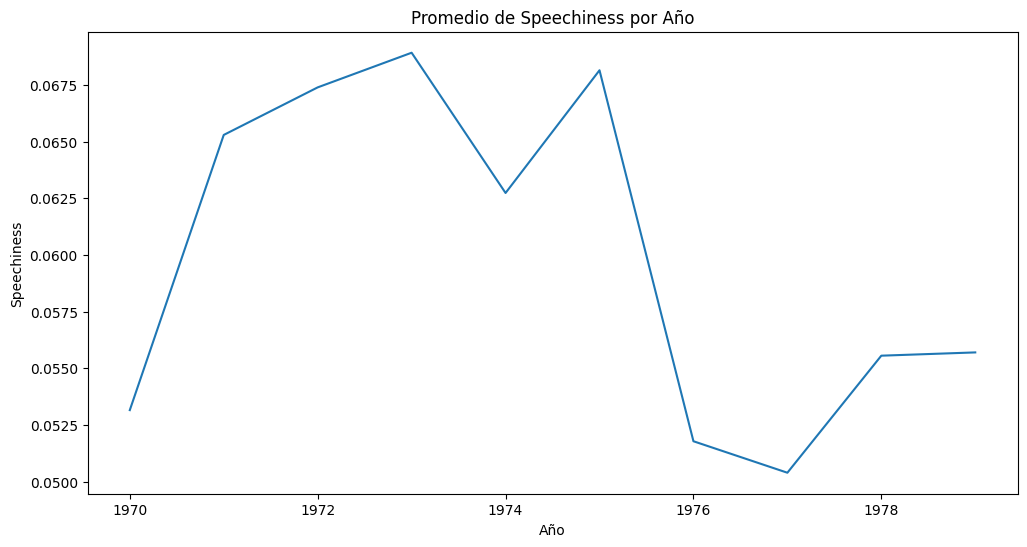

   Year  Speechiness
0  1970     0.053157
1  1971     0.065291
2  1972     0.067388
3  1973     0.068916
4  1974     0.062731
5  1975     0.068142
6  1976     0.051784
7  1977     0.050396
8  1978     0.055557
9  1979     0.055701

Número de canciones por año:
Year
1970     90
1971     96
1972     97
1973    100
1974     99
1975     99
1976    100
1977    100
1978    100
1979     99
Name: count, dtype: int64

Canciones con Speechiness más baja en 1975:
     Year  Speechiness  Artist  Track
494  1975       0.0270     NaN    NaN
502  1975       0.0279     NaN    NaN
503  1975       0.0248     NaN    NaN
505  1975       0.0261     NaN    NaN
512  1975       0.0239     NaN    NaN
520  1975       0.0262     NaN    NaN
531  1975       0.0275     NaN    NaN
543  1975       0.0276     NaN    NaN
554  1975       0.0269     NaN    NaN
561  1975       0.0248     NaN    NaN
579  1975       0.0279     NaN    NaN


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya tienes el DataFrame cargado como 'df'
# Si no, descomenta la siguiente línea y ajusta la ruta del archivo
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Calcular la media de Speechiness por año
speechiness_by_year = df.groupby('Year')['Speechiness'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Speechiness', data=speechiness_by_year)
plt.title('Promedio de Speechiness por Año')
plt.ylabel('Speechiness')
plt.xlabel('Año')
plt.show()

# Examinar los datos alrededor de 1975
print(speechiness_by_year[speechiness_by_year['Year'].between(1970, 1980)])

# Verificar la cantidad de canciones por año
songs_per_year = df['Year'].value_counts().sort_index()
print("\nNúmero de canciones por año:")
print(songs_per_year)

# Examinar las canciones con Speechiness más baja en 1975
low_speechiness_1975 = df[(df['Year'] == 1975) & (df['Speechiness'] < df['Speechiness'].quantile(0.1))]
print("\nCanciones con Speechiness más baja en 1975:")
print(low_speechiness_1975[['Year', 'Speechiness', 'Artist', 'Track']])

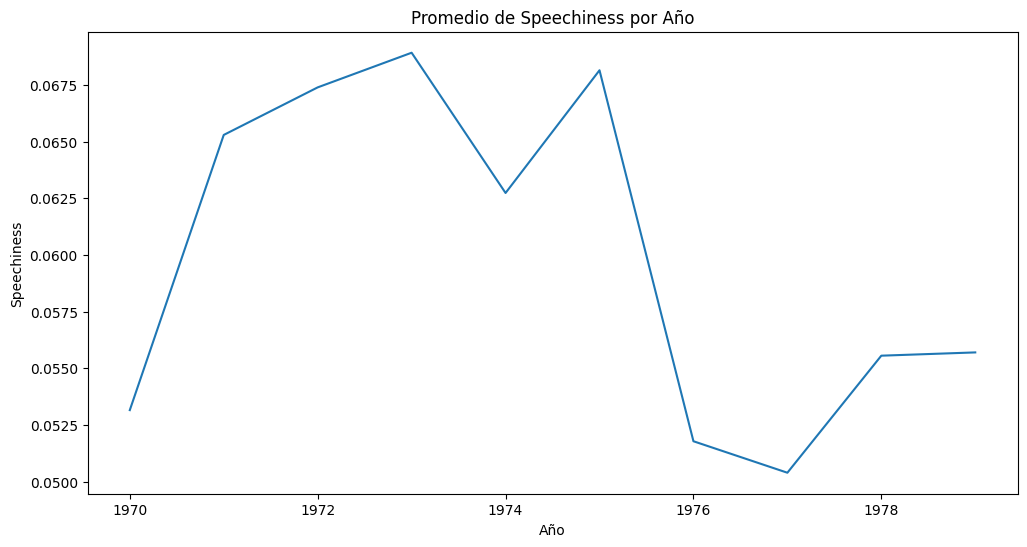

Promedio de Speechiness alrededor de 1975:
   Year  Speechiness
0  1970     0.053157
1  1971     0.065291
2  1972     0.067388
3  1973     0.068916
4  1974     0.062731
5  1975     0.068142
6  1976     0.051784
7  1977     0.050396
8  1978     0.055557
9  1979     0.055701

Número de canciones por año:
Year
1970     90
1971     96
1972     97
1973    100
1974     99
1975     99
1976    100
1977    100
1978    100
1979     99
Name: count, dtype: int64

Canciones con Speechiness más baja en 1975:
     Year  Speechiness  Artist  Track
494  1975       0.0270     NaN    NaN
502  1975       0.0279     NaN    NaN
503  1975       0.0248     NaN    NaN
505  1975       0.0261     NaN    NaN
512  1975       0.0239     NaN    NaN
520  1975       0.0262     NaN    NaN
531  1975       0.0275     NaN    NaN
543  1975       0.0276     NaN    NaN
554  1975       0.0269     NaN    NaN
561  1975       0.0248     NaN    NaN
579  1975       0.0279     NaN    NaN

Estadísticas de Speechiness para 1974:
coun

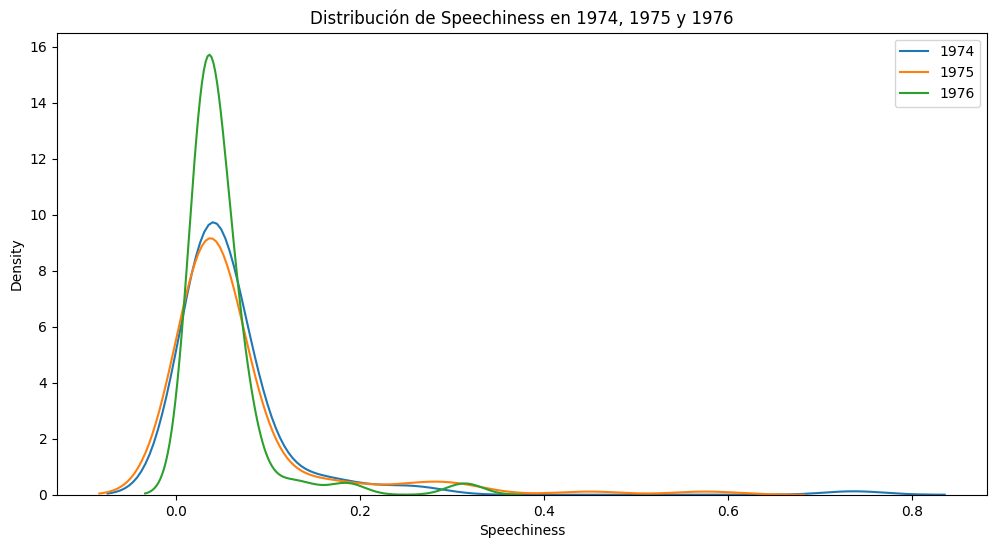

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asumiendo que ya tienes el DataFrame cargado como 'df'
# Si no, descomenta la siguiente línea y ajusta la ruta del archivo
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# Calcular la media de Speechiness por año
speechiness_by_year = df.groupby('Year')['Speechiness'].mean().reset_index()

# Visualizar la tendencia de Speechiness a lo largo del tiempo
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Speechiness', data=speechiness_by_year)
plt.title('Promedio de Speechiness por Año')
plt.ylabel('Speechiness')
plt.xlabel('Año')
plt.show()

# Examinar los datos alrededor de 1975
print("Promedio de Speechiness alrededor de 1975:")
print(speechiness_by_year[speechiness_by_year['Year'].between(1970, 1980)])

# Verificar la cantidad de canciones por año
songs_per_year = df['Year'].value_counts().sort_index()
print("\nNúmero de canciones por año:")
print(songs_per_year)

# Examinar las canciones con Speechiness más baja en 1975
low_speechiness_1975 = df[(df['Year'] == 1975) & (df['Speechiness'] < df['Speechiness'].quantile(0.1))]
print("\nCanciones con Speechiness más baja en 1975:")
print(low_speechiness_1975[['Year', 'Speechiness', 'Artist', 'Track']])

# Calcular estadísticas descriptivas para Speechiness en 1975 y años adyacentes
years_of_interest = [1974, 1975, 1976]
for year in years_of_interest:
    year_data = df[df['Year'] == year]['Speechiness']
    print(f"\nEstadísticas de Speechiness para {year}:")
    print(year_data.describe())

# Visualizar la distribución de Speechiness en 1975 y años adyacentes
plt.figure(figsize=(12, 6))
for year in years_of_interest:
    sns.kdeplot(df[df['Year'] == year]['Speechiness'], label=str(year))
plt.title('Distribución de Speechiness en 1974, 1975 y 1976')
plt.xlabel('Speechiness')
plt.legend()
plt.show()

## Pruebas api spotify

In [14]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

with open("SpotifyAPICredentials.txt", 'r') as archivo:
    lineas = archivo.readlines()
    client_id = lineas[1].strip()
    client_secret = lineas[2].strip()

In [15]:
df_spoti = pd.read_csv("Cleany.csv")

In [16]:
print(client_id,client_secret)
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

9f9d90ab653541a9907adc01545036ba ef6608495fb6487e9544a7d4c841b517


In [17]:
track = df_spoti[['Artist','Track']].iloc[10]
query = f"track:{track['Track']} artist:{track['Artist']}"
results = sp.search(q=query, type='track', limit=1)
results['tracks']['items'][0]['album']['release_date']
results['tracks']['items'][0]['artists'][0]['name']
results['tracks']['items'][0]['name']
results['tracks']['items'][0]['popularity']

#items = results['artists']['items']

# if len(items) > 0:
#     artista = items[0]  # Acceder directamente al primer artista
#     artista_info = sp.artist(artista['id'])
#     artista_info


69

In [27]:
df_spoti['Track_sp'] = ''
df_spoti['Artist_sp'] = ''
df_spoti['Popularity_sp'] = ''
df_spoti['Year_sp'] = ''

# Iterar sobre las filas del DataFrame
for index, row in df_spoti.iterrows():
    query = f"track:{row['Track']} artist:{row['Artist']}"
    results = sp.search(q=query, type='track', limit=1)
    
    if results['tracks']['items']:
        track = results['tracks']['items'][0]
        df_spoti.at[index, 'Track_sp'] = track['name']
        df_spoti.at[index, 'Artist_sp'] = track['artists'][0]['name']
        df_spoti.at[index, 'Popularity_sp'] = track['popularity']
        df_spoti.at[index,'Year_sp'] = track['album']['release_date']

    else:
        # Si no se encuentra el track, puedes dejar las columnas vacías o poner un valor predeterminado
        df_spoti.at[index, 'Track_sp'] = 'No encontrado'
        df_spoti.at[index, 'Artist_sp'] = 'No encontrado'
        df_spoti.at[index, 'Popularity_sp'] = None
        df_spoti.at[index,'Year_sp'] = None

In [28]:
from datetime import datetime

df_spoti.to_csv(f"df_spoti - {datetime.now()}")

In [4]:
import pandas as pd
df_spoti = pd.read_csv('df_spoti - 2024-09-16 18:27:12.062899')

## Analisis de filas no encontradas en spotify

In [5]:
df_spoti[['Track','Track_sp','Artist','Artist_sp','Popularity','Popularity_sp','Year','Year_sp']]
df_spoti[df_spoti['Popularity_sp'].isna()][['Track','Artist','Artist_sp','Popularity','Popularity_sp','Year','Year_sp']]

,Track,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
63,Don’t Play That Song (YOU Lied),Aretha Franklin with the Dixie Flyers,No encontrado,37,NaN,1970,NaN
78,Without Love (THERE Is Nothing),Tom Jones,No encontrado,28,NaN,1970,NaN
89,Whole Lotta Love / Living Loving Maid,Led Zeppelin,No encontrado,0,NaN,1970,NaN
95,Imagine,John Lennon / Plastic Ono Band,No encontrado,75,NaN,1971,NaN
173,Somos Novios (IT’S Impossible),Perry Como,No encontrado,29,NaN,1971,NaN
184,Have You Ever Seen The Rain / Hey Tonight,Creedence Clearwater Revival,No encontrado,0,NaN,1971,NaN
248,Betcha,"GOLLY, WOW",No encontrado,50,NaN,1972,NaN
268,The Candy Man,Sammy Davis Jr. with the Mike Curb Congregation,No encontrado,41,NaN,1972,NaN
361,Tie A Yellow Ribbon Round The Ole Oak Tree,Tony Orlando and Dawn,No encontrado,41,NaN,1973,NaN
371,Heartbeat – It’s A Lovebeat,the DeFranco Family featuring Tony DeFranco,No encontrado,31,NaN,1973,NaN


FTS
- 63    Don’t Play That Song (YOU Lied)        Aretha Franklin with the Dixie Flyers
- 268    The Candy Man    Sammy Davis Jr. with the Mike Curb Congregation
- 268    The Candy Man    Sammy Davis Jr. with the Mike Curb Congregation
- 456    Tsop (THE Sound Of Philadelphia)    MFSB featuring the Three Degrees
- 467    Clap For The Wolfman    The Guess Who featuring Wolfman Jack
- 481    (YOU’RE) Having My Baby    Paul Anka with Odia Coates
- 540    The Hustle    Van McCoy & the Soul City Symphony ???????????????? no es ft pero si xd
- 648    Get Closer    Seals and Crofts (featuring Carolyn Willis)
- 675    Nadia’s Theme (THE Young And The Restless)    Barry DeVorzon and Perry Botkin, Jr.


- 442    Whatever Gets You Thru The Night    John Lennon with the Plastic Ono Band

MAL
- 89    Whole Lotta Love / Living Loving Maid    Led Zeppelin
- 95 Imagine    John Lennon / Plastic Ono Band
- 184    Have You Ever Seen The Rain / Hey Tonight    Creedence Clearwater Revival
- 248    Betcha    GOLLY, WOW


VOLVER A BUSCAR
- 173    Somos Novios (IT’S Impossible)    Perry Como
- 386    Never, Never Gonna Give You Up    Barry White
- 482    Brazil    the Ritchie Family
- 571    Dynomite    Tony Camillo’s Bazuka
- 680    The Wreck Of The Edmund Fitzgerald (#2*)    Gordon Lightfoot
- 709    Jeans On    Lord David Dundas
- 757    Trying To Love Two    William Bell
- 772    Swayin’ To The Music (SLOW Dancing)    Johnny Rivers
- 921    Ooo Baby Baby    Linda Ronstadt
- 979    Dim All The Nights    Donna Summer

SPOTY NO LA TIENE?
- 381    Also Sprach Zarathustra (2001)    Deodato
- 414    Americans    Byron MacGregor
- 643    Happy Days    Pratt and McClain


CHECKEAR  Y VER OTROS VALORES:
- 456    Tsop (THE Sound Of Philadelphia)    MFSB featuring the Three Degrees


In [32]:
df_spoti[['Track','Track_sp','Artist','Artist_sp','Popularity','Popularity_sp','Year','Year_sp']]

,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
0,Abc,ABC,The Jackson 5,The Jackson 5,81,67,1970,1970-05-08
1,Let It Be,Let It Be - Remastered 2009,The Beatles,The Beatles,78,78,1970,1970-05-08
2,I Want You Back,I Want You Back,The Jackson 5,The Jackson 5,78,77,1970,1969-12-18
3,Cecilia,Cecilia,Simon & Garfunkel,Simon & Garfunkel,76,72,1970,1970-01-26
4,Spirit In The Sky,Spirit In The Sky - Deluxe Edition,Norman Greenbaum,Norman Greenbaum,75,74,1970,1969-01-01
...,...,...,...,...,...,...,...,...
975,He’s The Greatest Dancer,He's the Greatest Dancer - 1995 Remaster,Sister Sledge,Sister Sledge,14,61,1979,1979-02-15
976,Don’t Cry Out Loud,Don't Cry Out Loud,Melissa Manchester,Melissa Manchester,9,43,1979,1978
977,When You’re In Love With A Beautiful Woman,When You're In Love With A Beautiful Woman,Dr. Hook,Dr. Hook,7,64,1979,1978
978,I’ll Never Love This Way Again,I'll Never Love This Way Again,Dionne Warwick,Dionne Warwick,5,62,1979,1979-01-01


## Canciones junto a su año, si es que este des distinto al de nuestro dataset

In [7]:
df_spoti_mod = df_spoti.copy()
df_spoti_mod['Year_sp'] = df_spoti_mod['Year_sp'].apply(lambda x: pd.to_datetime(x))
df_spoti_mod['Year_sp'] = df_spoti_mod['Year_sp'].dt.year

filtrado_por_anio_distinto = df_spoti_mod[df_spoti_mod['Year_sp'] != df_spoti_mod['Year']][['Track','Track_sp','Artist','Artist_sp','Popularity','Popularity_sp','Year','Year_sp']]
filtrado_por_anio_distinto

,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
2,I Want You Back,I Want You Back,The Jackson 5,The Jackson 5,78,77.0,1970,1969.0
4,Spirit In The Sky,Spirit In The Sky - Deluxe Edition,Norman Greenbaum,Norman Greenbaum,75,74.0,1970,1969.0
6,The Letter,The Letter - Single Version,Joe Cocker,Joe Cocker,72,43.0,1970,1999.0
7,The House Of The Rising Sun,The House Of The Rising Sun - Remastered 1985,Frijid Pink,Frijid Pink,71,33.0,1970,1985.0
12,Venus,Venus,Shocking Blue,Shocking Blue,69,64.0,1970,1969.0
...,...,...,...,...,...,...,...,...
973,We’ve Got Tonight,We've Got Tonight,Bob Seger & The Silver Bullet Band,Bob Seger,26,57.0,1979,1978.0
974,The Main Event/Fight,The Main Event/Fight,Barbra Streisand,Barbra Streisand,25,25.0,1979,2002.0
976,Don’t Cry Out Loud,Don't Cry Out Loud,Melissa Manchester,Melissa Manchester,9,43.0,1979,1978.0
977,When You’re In Love With A Beautiful Woman,When You're In Love With A Beautiful Woman,Dr. Hook,Dr. Hook,7,64.0,1979,1978.0


## Canciones que tienen nombre distinto de la busqueda de spoty y distinto año

In [ ]:

filtrado_por_anio_distinto[filtrado_por_anio_distinto['Track'].str.lower() != filtrado_por_anio_distinto['Track_sp'].str.lower()]

,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
4,Spirit In The Sky,Spirit In The Sky - Deluxe Edition,Norman Greenbaum,Norman Greenbaum,75,74,1970,1969.0
6,The Letter,The Letter - Single Version,Joe Cocker,Joe Cocker,72,43,1970,1999.0
7,The House Of The Rising Sun,The House Of The Rising Sun - Remastered 1985,Frijid Pink,Frijid Pink,71,33,1970,1985.0
17,Raindrops Keep Fallin’ On My Head,Raindrops Keep Fallin' On My Head,B.J. Thomas,B.J. Thomas,63,63,1970,1968.0
20,Hitchin’ A Ride,Hitchin' A Ride,Vanity Fare,Vanity Fare,63,41,1970,2011.0
25,Get Ready,Get Ready - Single Version,Rare Earth,Rare Earth,61,39,1970,2005.0
36,Instant Karma!,Instant Karma! (We All Shine On) - Remastered ...,John Lennon,John Lennon,52,51,1970,2010.0
45,Jingle Jangle,"Jingle, Jangle",the Archies,The Archies,48,24,1970,1969.0
50,Take A Letter Maria,"Take a Letter, Maria",R.B. Greaves,R.B. Greaves,46,46,1970,1969.0
52,Ball Of Confusion (THAT’S What The World Is To...,Ball Of Confusion (That's What The World Is To...,The Temptations,The Temptations,45,45,1970,2000.0


## Filtrado diferencia de un año

In [ ]:
filtrado_por_anio_diferencia = df_spoti_mod[abs(df_spoti_mod['Year_sp'] - df_spoti_mod['Year']) == 1][['Track','Track_sp','Artist','Artist_sp','Popularity','Popularity_sp','Year','Year_sp']]
filtrado_por_anio_diferencia.head(50)

,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
2,I Want You Back,I Want You Back,The Jackson 5,The Jackson 5,78,77,1970,1969.0
4,Spirit In The Sky,Spirit In The Sky - Deluxe Edition,Norman Greenbaum,Norman Greenbaum,75,74,1970,1969.0
12,Venus,Venus,Shocking Blue,Shocking Blue,69,64,1970,1969.0
23,Evil Ways,Evil Ways,Santana,Santana,62,62,1970,1969.0
43,Hey There Lonely Girl,Hey There Lonely Girl,Eddie Holman,Eddie Holman,49,49,1970,1969.0
44,Holly Holy,Holly Holy,Neil Diamond,Neil Diamond,49,49,1970,1969.0
45,Jingle Jangle,"Jingle, Jangle",the Archies,The Archies,48,24,1970,1969.0
50,Take A Letter Maria,"Take a Letter, Maria",R.B. Greaves,R.B. Greaves,46,46,1970,1969.0
51,Reflections Of My Life,Reflections of My Life,Marmalade,Marmalade,45,45,1970,1969.0
79,Someday We’ll Be Together,Someday We'll Be Together,Diana Ross & the Supremes,Diana Ross & The Supremes,27,54,1970,1969.0


## Que tengan by en el nombre

In [ ]:
df_spoti_mod[df_spoti_mod['Track_sp'].str.contains('Remastered')][['Track','Track_sp','Artist','Artist_sp','Popularity','Popularity_sp','Year','Year_sp']]

,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
1,Let It Be,Let It Be - Remastered 2009,The Beatles,The Beatles,78,78,1970,1970.0
7,The House Of The Rising Sun,The House Of The Rising Sun - Remastered 1985,Frijid Pink,Frijid Pink,71,33,1970,1985.0
21,Come And Get It,Come And Get It - Remastered 2010,Badfinger,Badfinger,62,46,1970,1970.0
36,Instant Karma!,Instant Karma! (We All Shine On) - Remastered ...,John Lennon,John Lennon,52,51,1970,2010.0
106,Peace Train,Peace Train - Remastered 2021,Cat Stevens,Yusuf / Cat Stevens,67,66,1971,1971.0
107,Brown Sugar,Brown Sugar - Remastered 2009,The Rolling Stones,The Rolling Stones,67,66,1971,1971.0
118,No Matter What,No Matter What - Remastered 2010,Badfinger,Badfinger,59,56,1971,1970.0
130,Theme From Shaft,Theme From Shaft - Remastered 2009,Isaac Hayes,Isaac Hayes,56,56,1971,1971.0
141,Mr. Bojangles,Mr. Bojangles - Remastered 2001,Nitty Gritty Dirt Band,Nitty Gritty Dirt Band,52,51,1971,2001.0
206,Morning Has Broken,Morning Has Broken - Remastered 2021,Cat Stevens,Yusuf / Cat Stevens,69,69,1972,1971.0


## Nombres muy distintos

In [8]:
from fuzzywuzzy import fuzz

# Función para comparar la similitud de los títulos
def are_titles_similar(title1, title2, threshold=90):
    return fuzz.ratio(title1.lower(), title2.lower()) < threshold

# Filtramos las filas donde los títulos son diferentes por más de una letra
df_filtered = df_spoti_mod[df_spoti_mod.apply(lambda row: are_titles_similar(row['Track'], row['Track_sp']), axis=1)]

# Mostramos las columnas de interés
df_filtered[['Track', 'Track_sp', 'Artist', 'Artist_sp', 'Popularity', 'Popularity_sp', 'Year', 'Year_sp']]


,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
1,Let It Be,Let It Be - Remastered 2009,The Beatles,The Beatles,78,78.0,1970,1970.0
4,Spirit In The Sky,Spirit In The Sky - Deluxe Edition,Norman Greenbaum,Norman Greenbaum,75,74.0,1970,1969.0
6,The Letter,The Letter - Single Version,Joe Cocker,Joe Cocker,72,43.0,1970,1999.0
7,The House Of The Rising Sun,The House Of The Rising Sun - Remastered 1985,Frijid Pink,Frijid Pink,71,33.0,1970,1985.0
8,Fire And Rain,Fire and Rain - 2019 Remaster,James Taylor,James Taylor,71,73.0,1970,1970.0
...,...,...,...,...,...,...,...,...
956,I Love The Nightlife,I Love The Nightlife (Disco 'Round),Alicia Bridges,Alicia Bridges,48,48.0,1979,1978.0
957,Makin’ It,Makin' It (Re-Recorded),David Naughton,David Naughton,48,32.0,1979,2012.0
959,You Take My Breath Away,You Take My Breath Away - Mono Version,Rex Smith,Rex Smith,47,47.0,1979,1979.0
975,He’s The Greatest Dancer,He's the Greatest Dancer - 1995 Remaster,Sister Sledge,Sister Sledge,14,61.0,1979,1979.0


In [16]:
# Función para verificar si uno de los títulos está contenido en el otro
def is_title_contained(track1, track2):
    track1_lower = track1.lower().strip()
    track2_lower = track2.lower().strip()
    return track1_lower in track2_lower or track2_lower in track1_lower

# Filtrar las filas donde uno de los títulos esté contenido en el otro
df_filtered_contained = df_filtered[~df_filtered.apply(lambda row: is_title_contained(row['Track'], row['Track_sp']), axis=1)]

# Mostramos las columnas de interés
filtrado_sin_na = df_filtered_contained.dropna(axis='rows')[['Track', 'Track_sp', 'Artist', 'Artist_sp', 'Popularity', 'Popularity_sp', 'Year', 'Year_sp']].head(50)
filtrado_sin_na

,Track,Track_sp,Artist,Artist_sp,Popularity,Popularity_sp,Year,Year_sp
16,Cracklin’ Rosie,Cracklin' Rosie - Single Version,Neil Diamond,Neil Diamond,64,64.0,1970,1970.0
28,"He Ain’t Heavy, He’s My Brother",He Ain't Heavy He's My Brother - 2003 Remaster,The Hollies,The Hollies,60,62.0,1970,1970.0
52,Ball Of Confusion (THAT’S What The World Is To...,Ball Of Confusion (That's What The World Is To...,The Temptations,The Temptations,45,45.0,1970,2000.0
74,(I Know) I’m Losing You,(I Know) I'm Losing You - Single Version,Rare Earth,Rare Earth,31,33.0,1970,1970.0
87,Come Together / Something *,Megamix 2: The Long And Winding Road/Something...,The Beatles,The Bornagen Beatles,14,0.0,1970,2011.0
120,I Am…I Said,I Am...I Said - Single Version,Neil Diamond,Neil Diamond,59,60.0,1971,1971.0
121,Uncle Albert/Admiral Halsey,Uncle Albert / Admiral Halsey - Medley / 2012 ...,Paul & Linda McCartney,Paul McCartney,59,58.0,1971,1971.0
127,(WHERE Do I Begin?) Love Story,"Where Do I Begin - Love Theme from ""Love Story""",Andy Williams,Andy Williams,56,54.0,1971,1971.0
131,You’ve Got A Friend,You've Got a Friend - 2019 Remaster,James Taylor,James Taylor,55,65.0,1971,1971.0
143,Stick-Up,Stick Up,Honey Cone,Honey Cone,51,22.0,1971,1971.0


In [25]:
valores = df_spoti['Key'].value_counts()

equivalencia_notas = {0: "C", 1: "C#", 2: "D", 3: "D#", 4: "E", 5: "F", 6: "F#", 7: "G", 8: "G#", 9: "A", 10: "A#", 11: "B"}

valores

TypeError: Index does not support mutable operations